In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

Ages from https://ui.adsabs.harvard.edu/abs/2019yCat..22390032P/abstract

# For AS stars

In [2]:
df=pd.read_pickle('../ASstars.pkl')
print(len(df))


6727


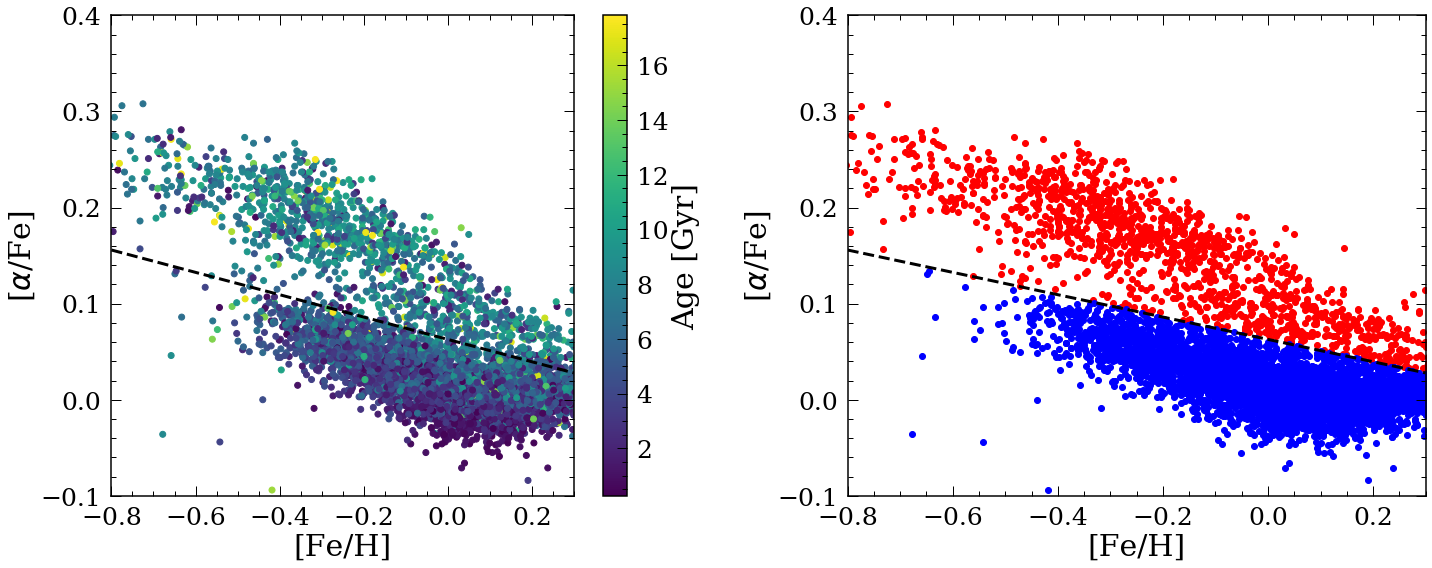

In [3]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df['FeH'],df['AFe'],c=df['Age'])
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df[df['AFe']-p(df['FeH'])>=0]
low_alpha=df[df['AFe']-p(df['FeH'])<0]

p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.subplot(1,2,2)
plt.scatter(high_alpha['FeH'],high_alpha['AFe'],c='r')
plt.scatter(low_alpha['FeH'],low_alpha['AFe'],c='b')
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()

In [4]:
df_abun_st_ha=high_alpha.loc[abs(high_alpha['FeH'])<0.1]
df_abun_st_la=low_alpha.loc[abs(low_alpha['FeH'])<0.1]

100%|██████████| 100/100 [00:00<00:00, 213.07it/s]


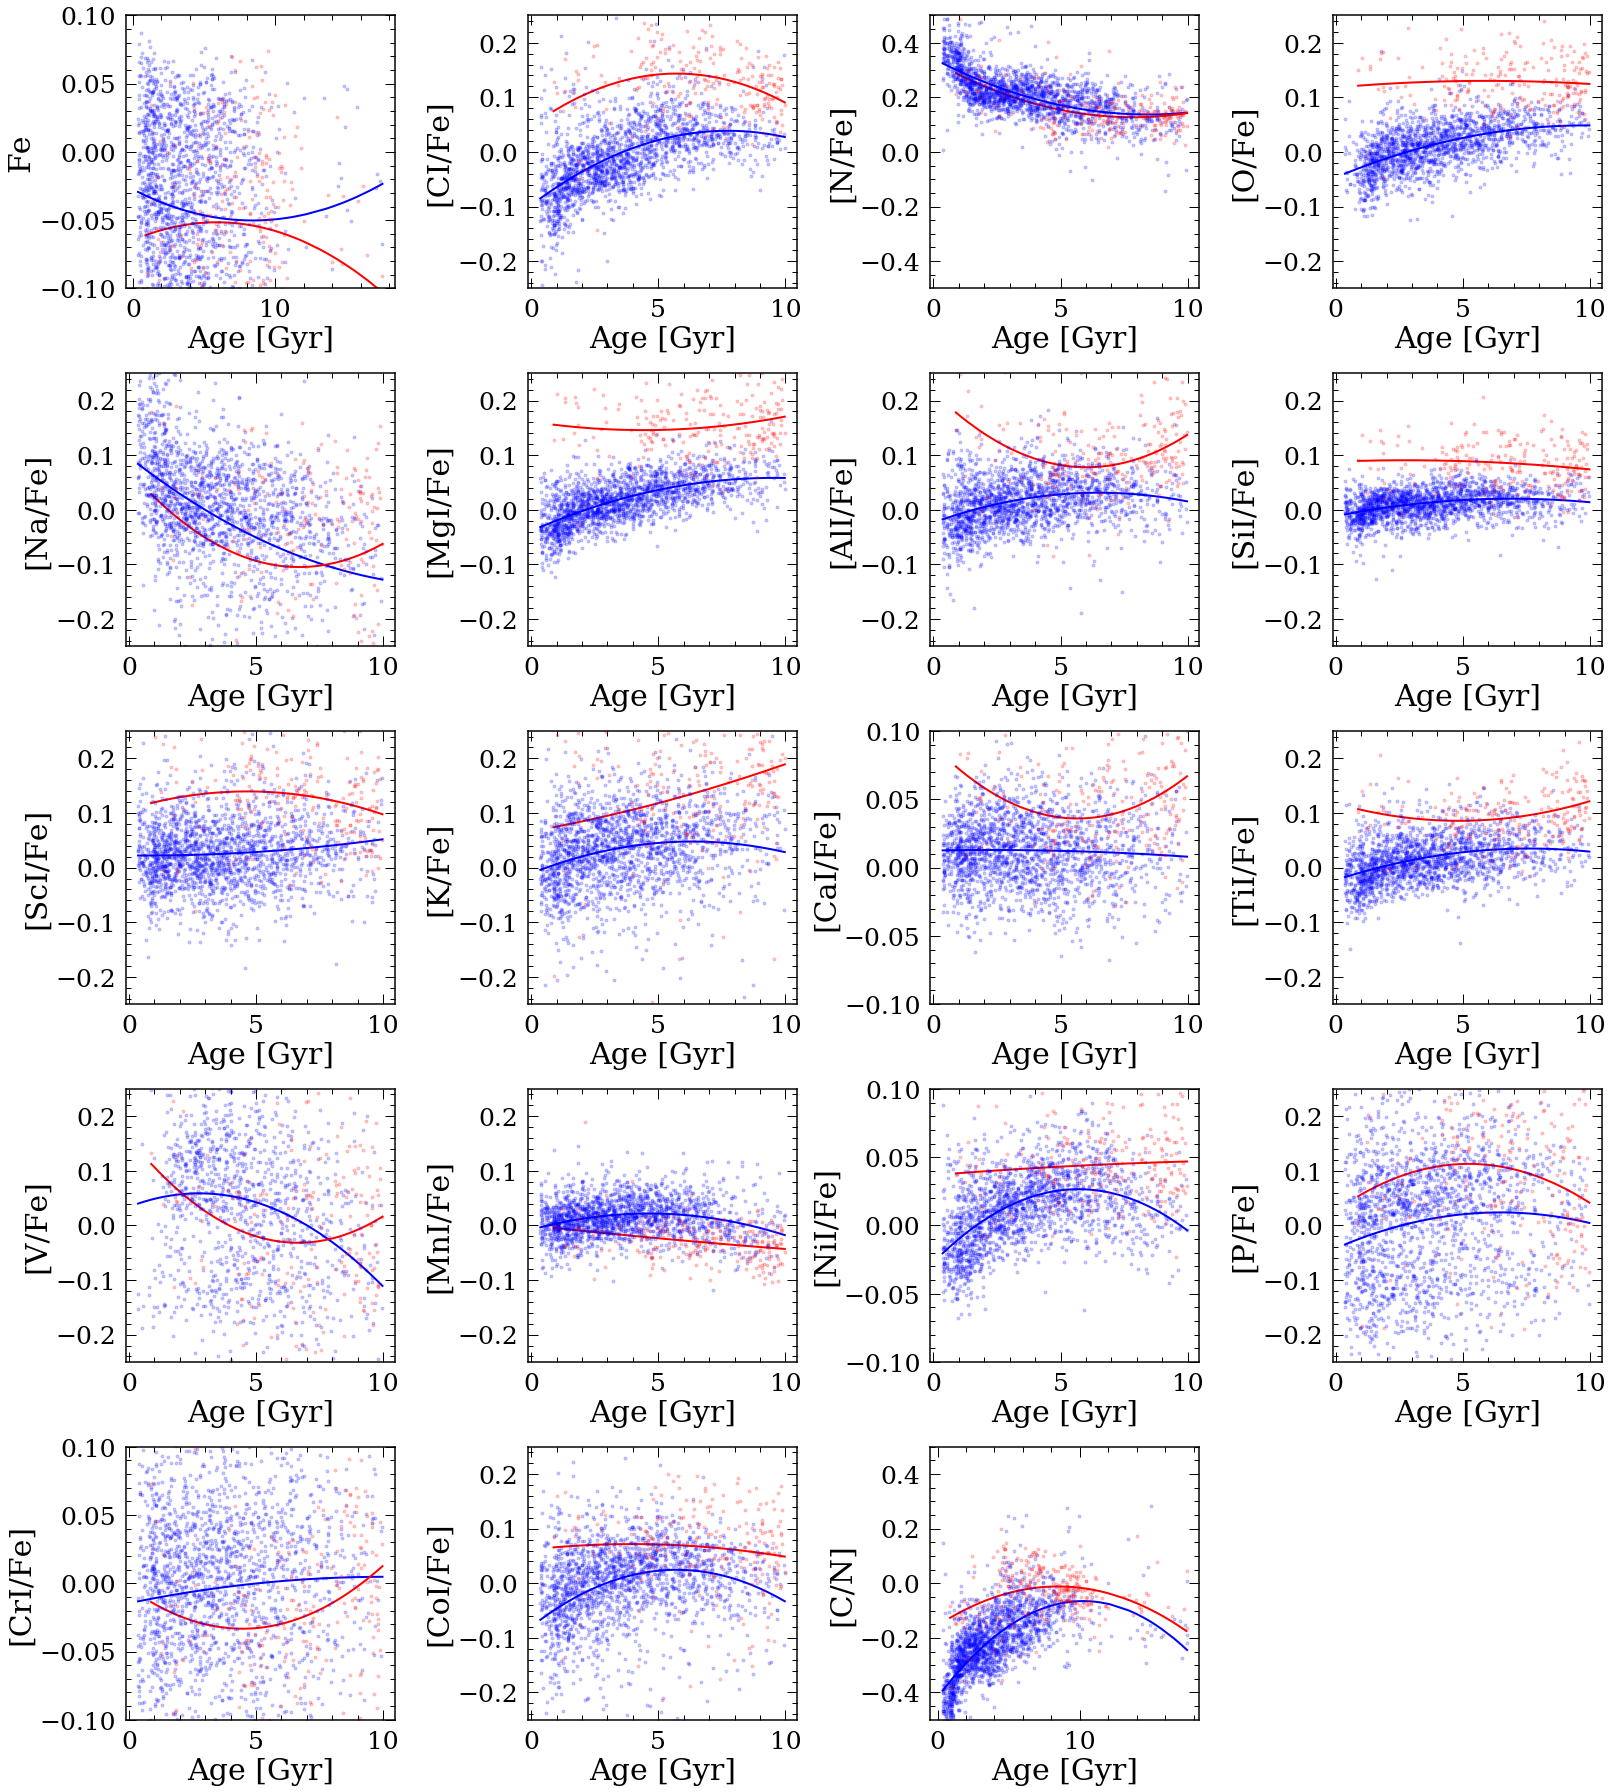

In [9]:
hi_dis, lo_dis, tot_hi_dis, tot_lo_dis, Abunname=plotTrends(df_abun_st_ha,df_abun_st_la,'abundance','linear',2)

  3%|▎         | 3/100 [00:00<00:03, 28.32it/s]

C_N



100%|██████████| 100/100 [00:02<00:00, 38.93it/s]

100%|██████████| 100/100 [00:07<00:00, 12.74it/s]

100%|██████████| 100/100 [00:06<00:00, 15.10it/s]

100%|██████████| 100/100 [00:05<00:00, 19.61it/s][A

100%|██████████| 100/100 [00:04<00:00, 22.01it/s][A

100%|██████████| 100/100 [00:03<00:00, 32.33it/s][A

100%|██████████| 100/100 [00:01<00:00, 50.69it/s][A

100%|██████████| 100/100 [00:01<00:00, 85.86it/s][A

100%|██████████| 100/100 [00:00<00:00, 172.84it/s][A

100%|██████████| 100/100 [00:00<00:00, 294.35it/s][A

100%|██████████| 10/10 [00:36<00:00,  3.68s/it]


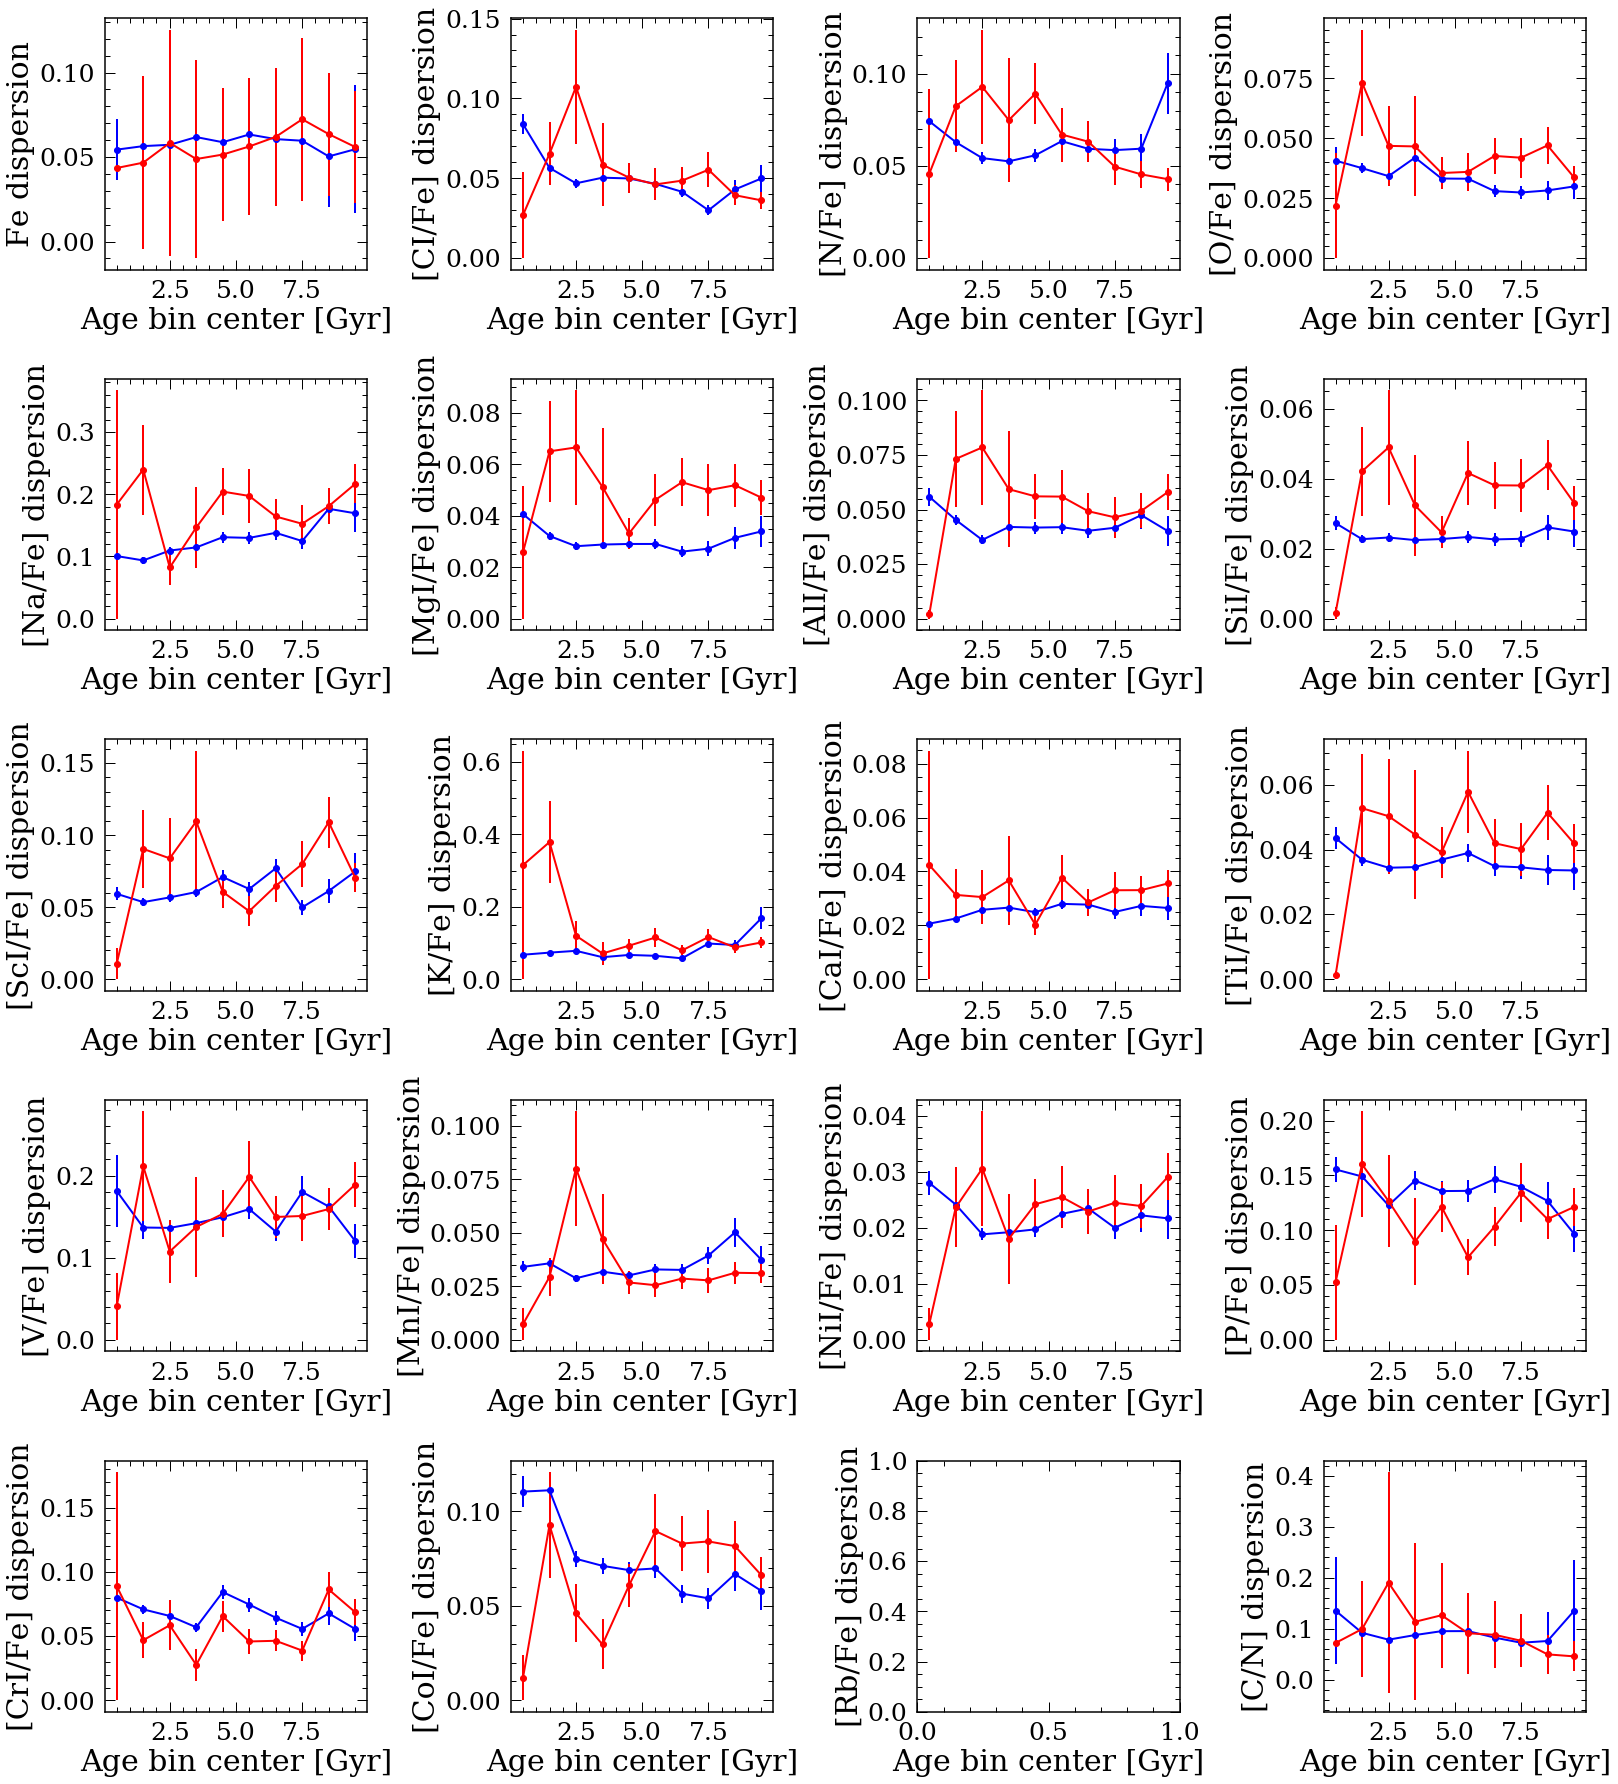

In [7]:
plotagedis(df_abun_st_ha,df_abun_st_la,1,0,10)

# For rc stars

In [5]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','ALPHA_M']
print(len(abun_apog))

19


In [6]:
df_CM=pd.read_pickle('../CannonDR16.pkl')
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]
df_CM=df_CM.reset_index(drop=True)

print('All stars:',len(df_CM))

# get red clump stars
df_rc=df_CM.loc[df_CM['DP']>230]


print('rc stars',len(df_rc))

All stars: 64399
rc stars 22074


Plot age image

/Users/lucy/Desktop/SecondYear/Figures/HeaderP.py:1139: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm


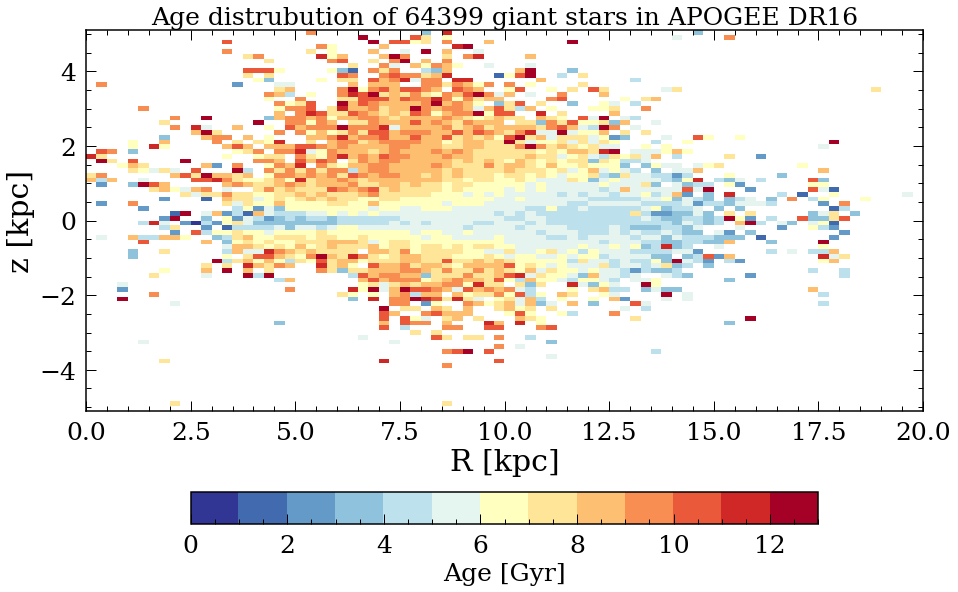

In [7]:

x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

image=makeagemap_each(df_CM['R'].values,df_CM['z'].values,
                df_CM['Age'].values,lims, binnum)


plt.figure(figsize=(15,10))
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
cb.set_label('Age [Gyr]',fontsize = 25,labelpad = 5)
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d giant stars in APOGEE DR16'%len(df_CM),fontsize=25)

plt.savefig('ageAll.png')

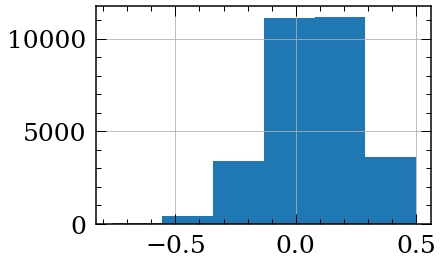

In [59]:
df_all['M_H'].hist(bins=6)

100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


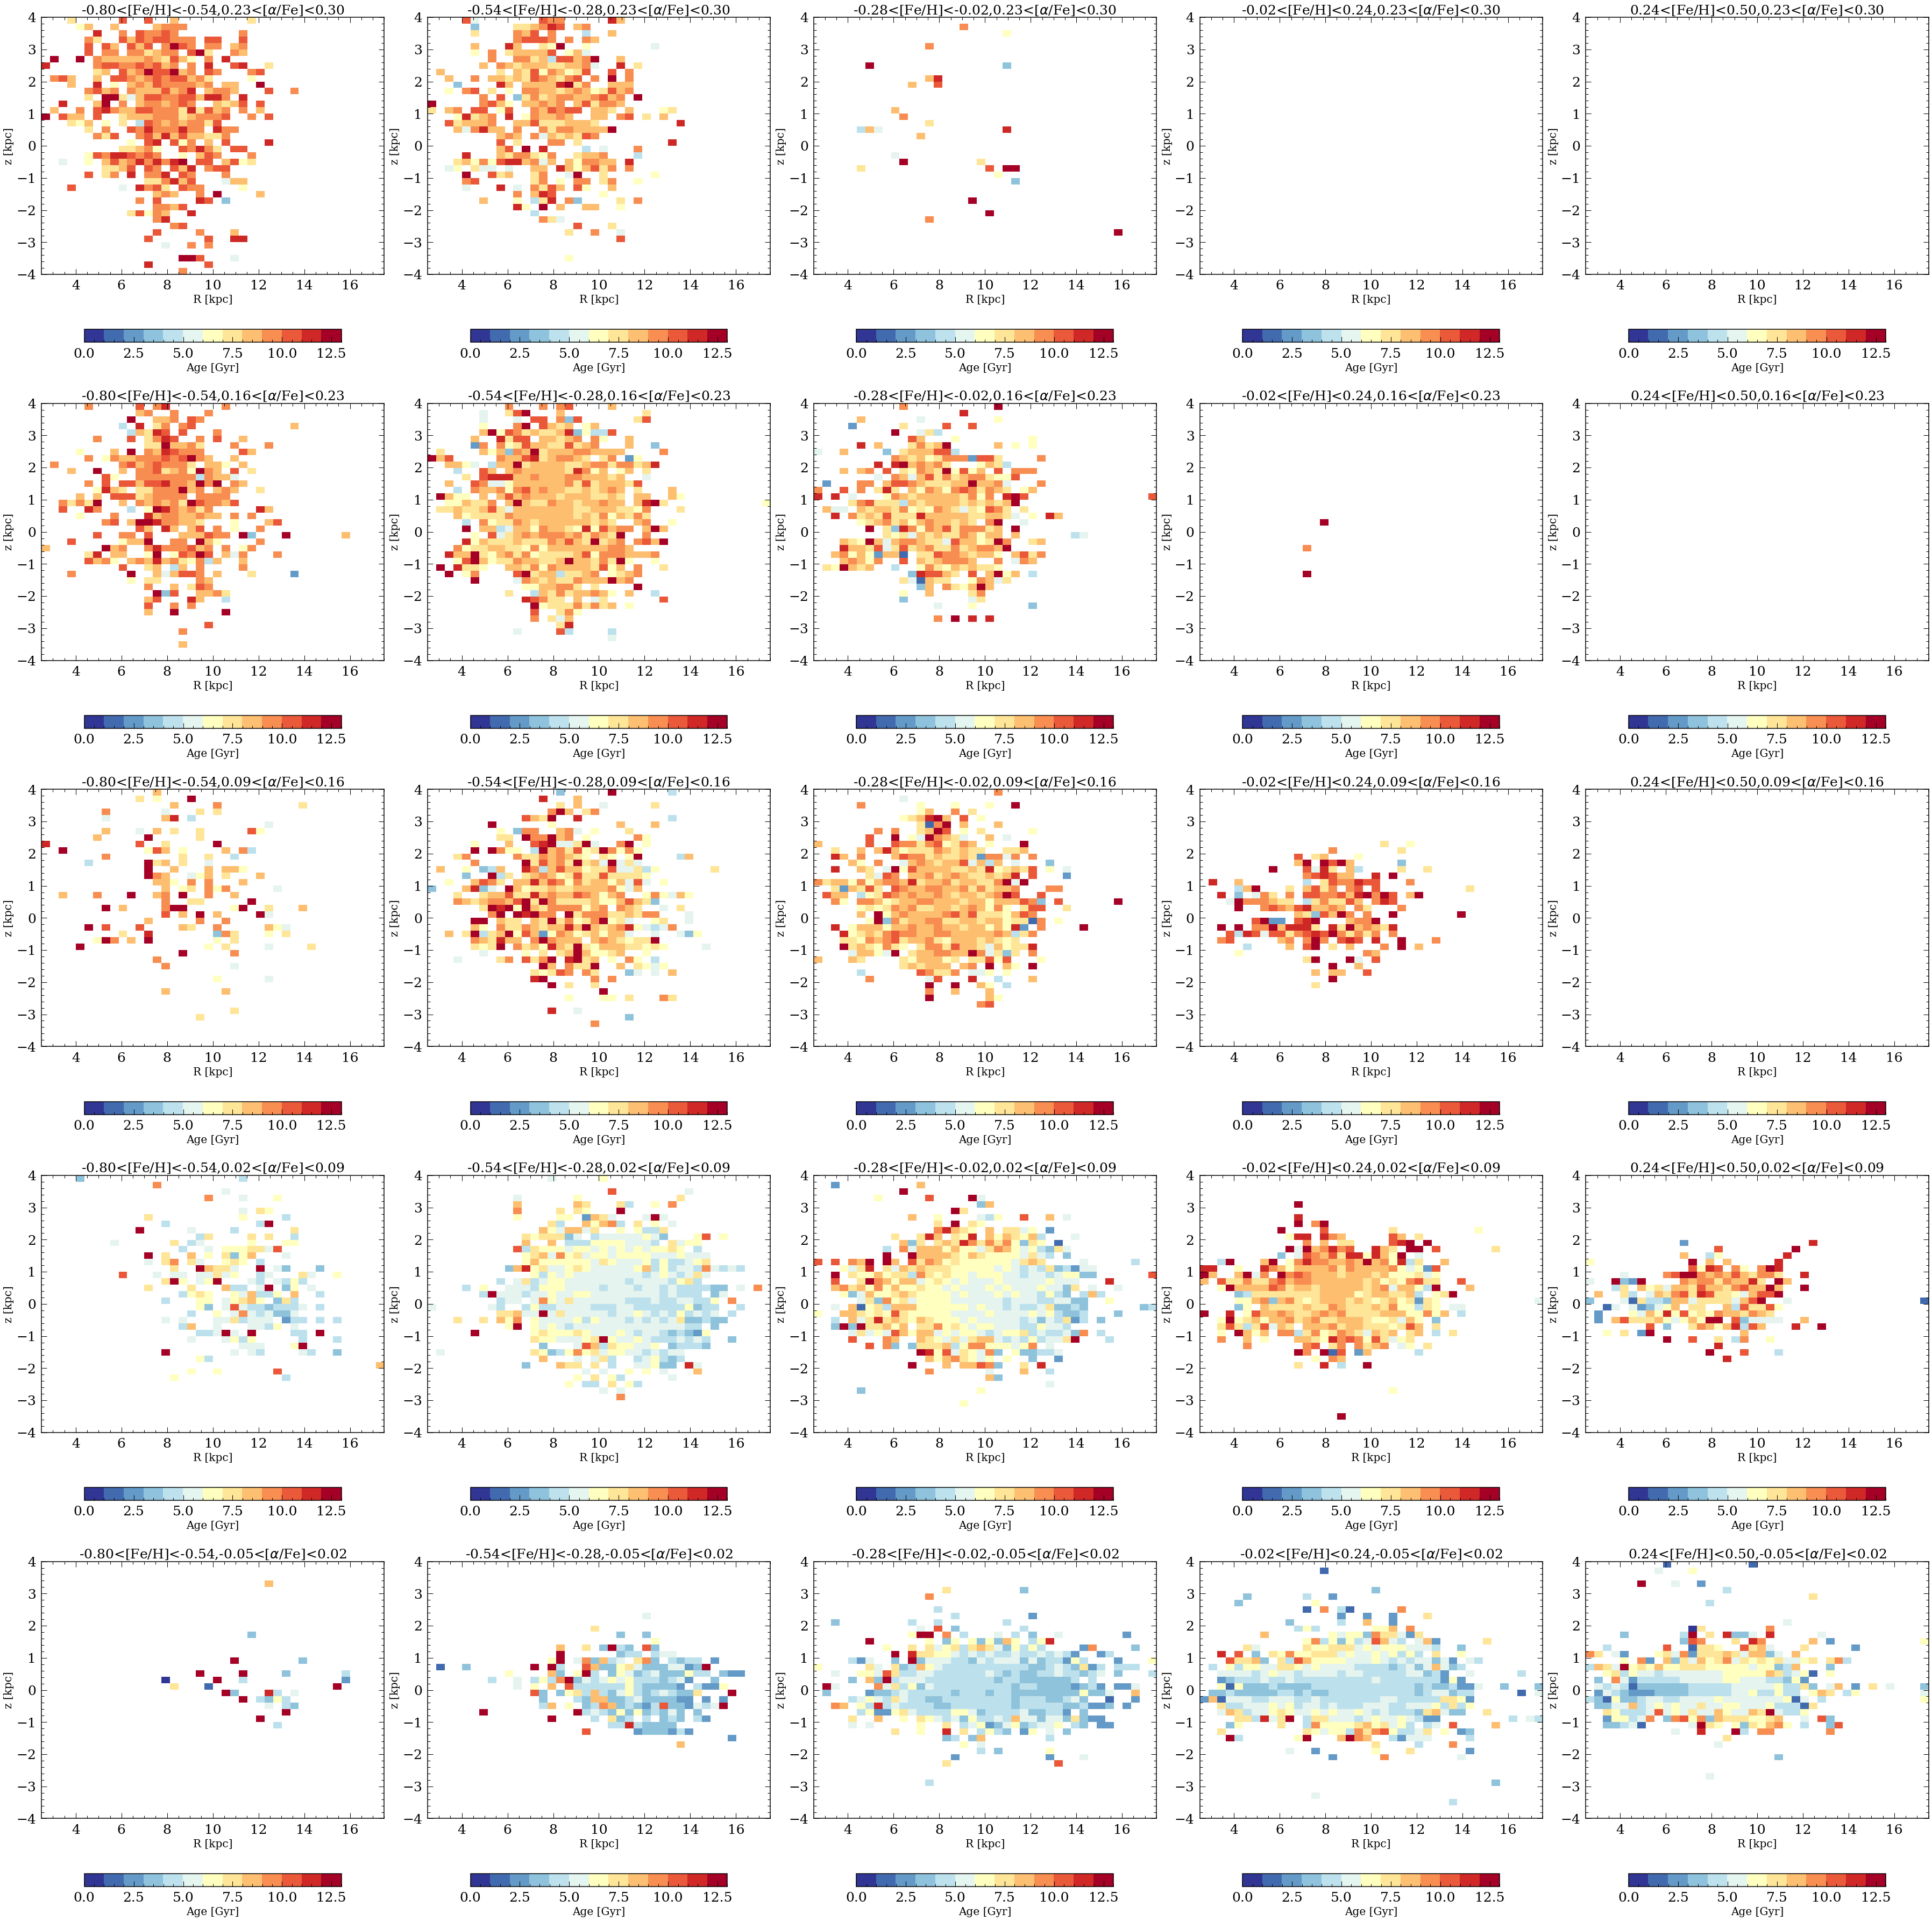

In [61]:
from scipy.ndimage import gaussian_filter

Febin=np.linspace(-0.8,0.5,6)
alpha=np.linspace(0.3,-0.05,6)

plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))
count=1

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        plt.subplot(len(alpha)-1,len(Febin)-1,count)
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        plt.subplots_adjust(bottom=0.20)
        plt.xlabel("R [kpc]",fontsize = 20,labelpad =5)
        plt.ylabel("z [kpc]" ,fontsize = 20)
    
        cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        fs = 20
        cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        count=count+1
        plt.title('%.2f<[Fe/H]<%.2f,%.2f<[$\\alpha$/Fe]<%.2f'%(Febin[j],Febin[j+1],alpha[i+1],alpha[i]),fontsize=25)
        plt.tight_layout()
plt.savefig('monofealpha.png')


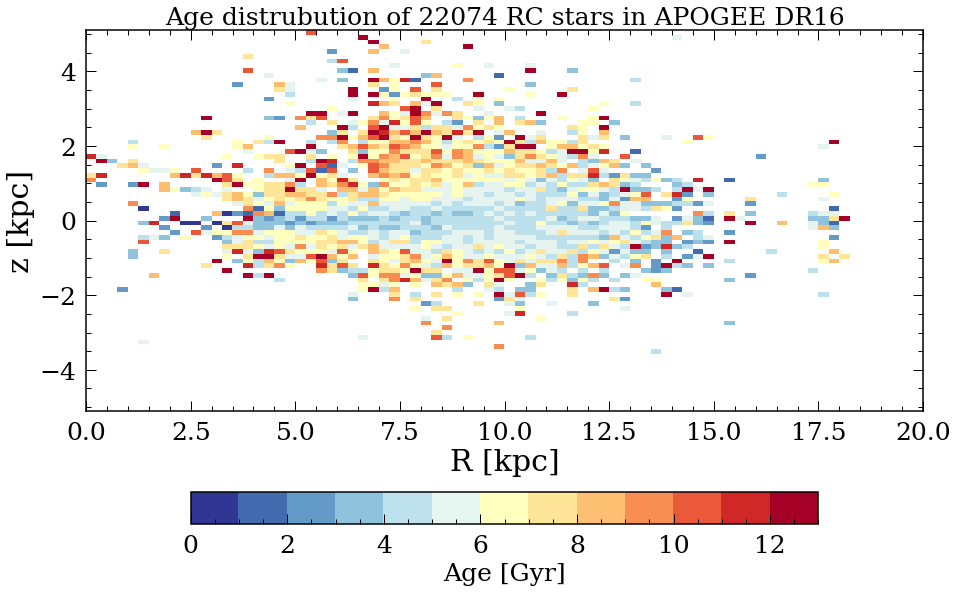

In [9]:

x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

image=makeagemap_each(df_rc['R'].values,df_rc['z'].values,
                df_rc['Age'].values,lims, binnum)


plt.figure(figsize=(15,10))
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
cb.set_label('Age [Gyr]',fontsize = 25,labelpad = 5)
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d RC stars in APOGEE DR16'%len(df_rc),fontsize=25)

plt.savefig('ageRC.png')

100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


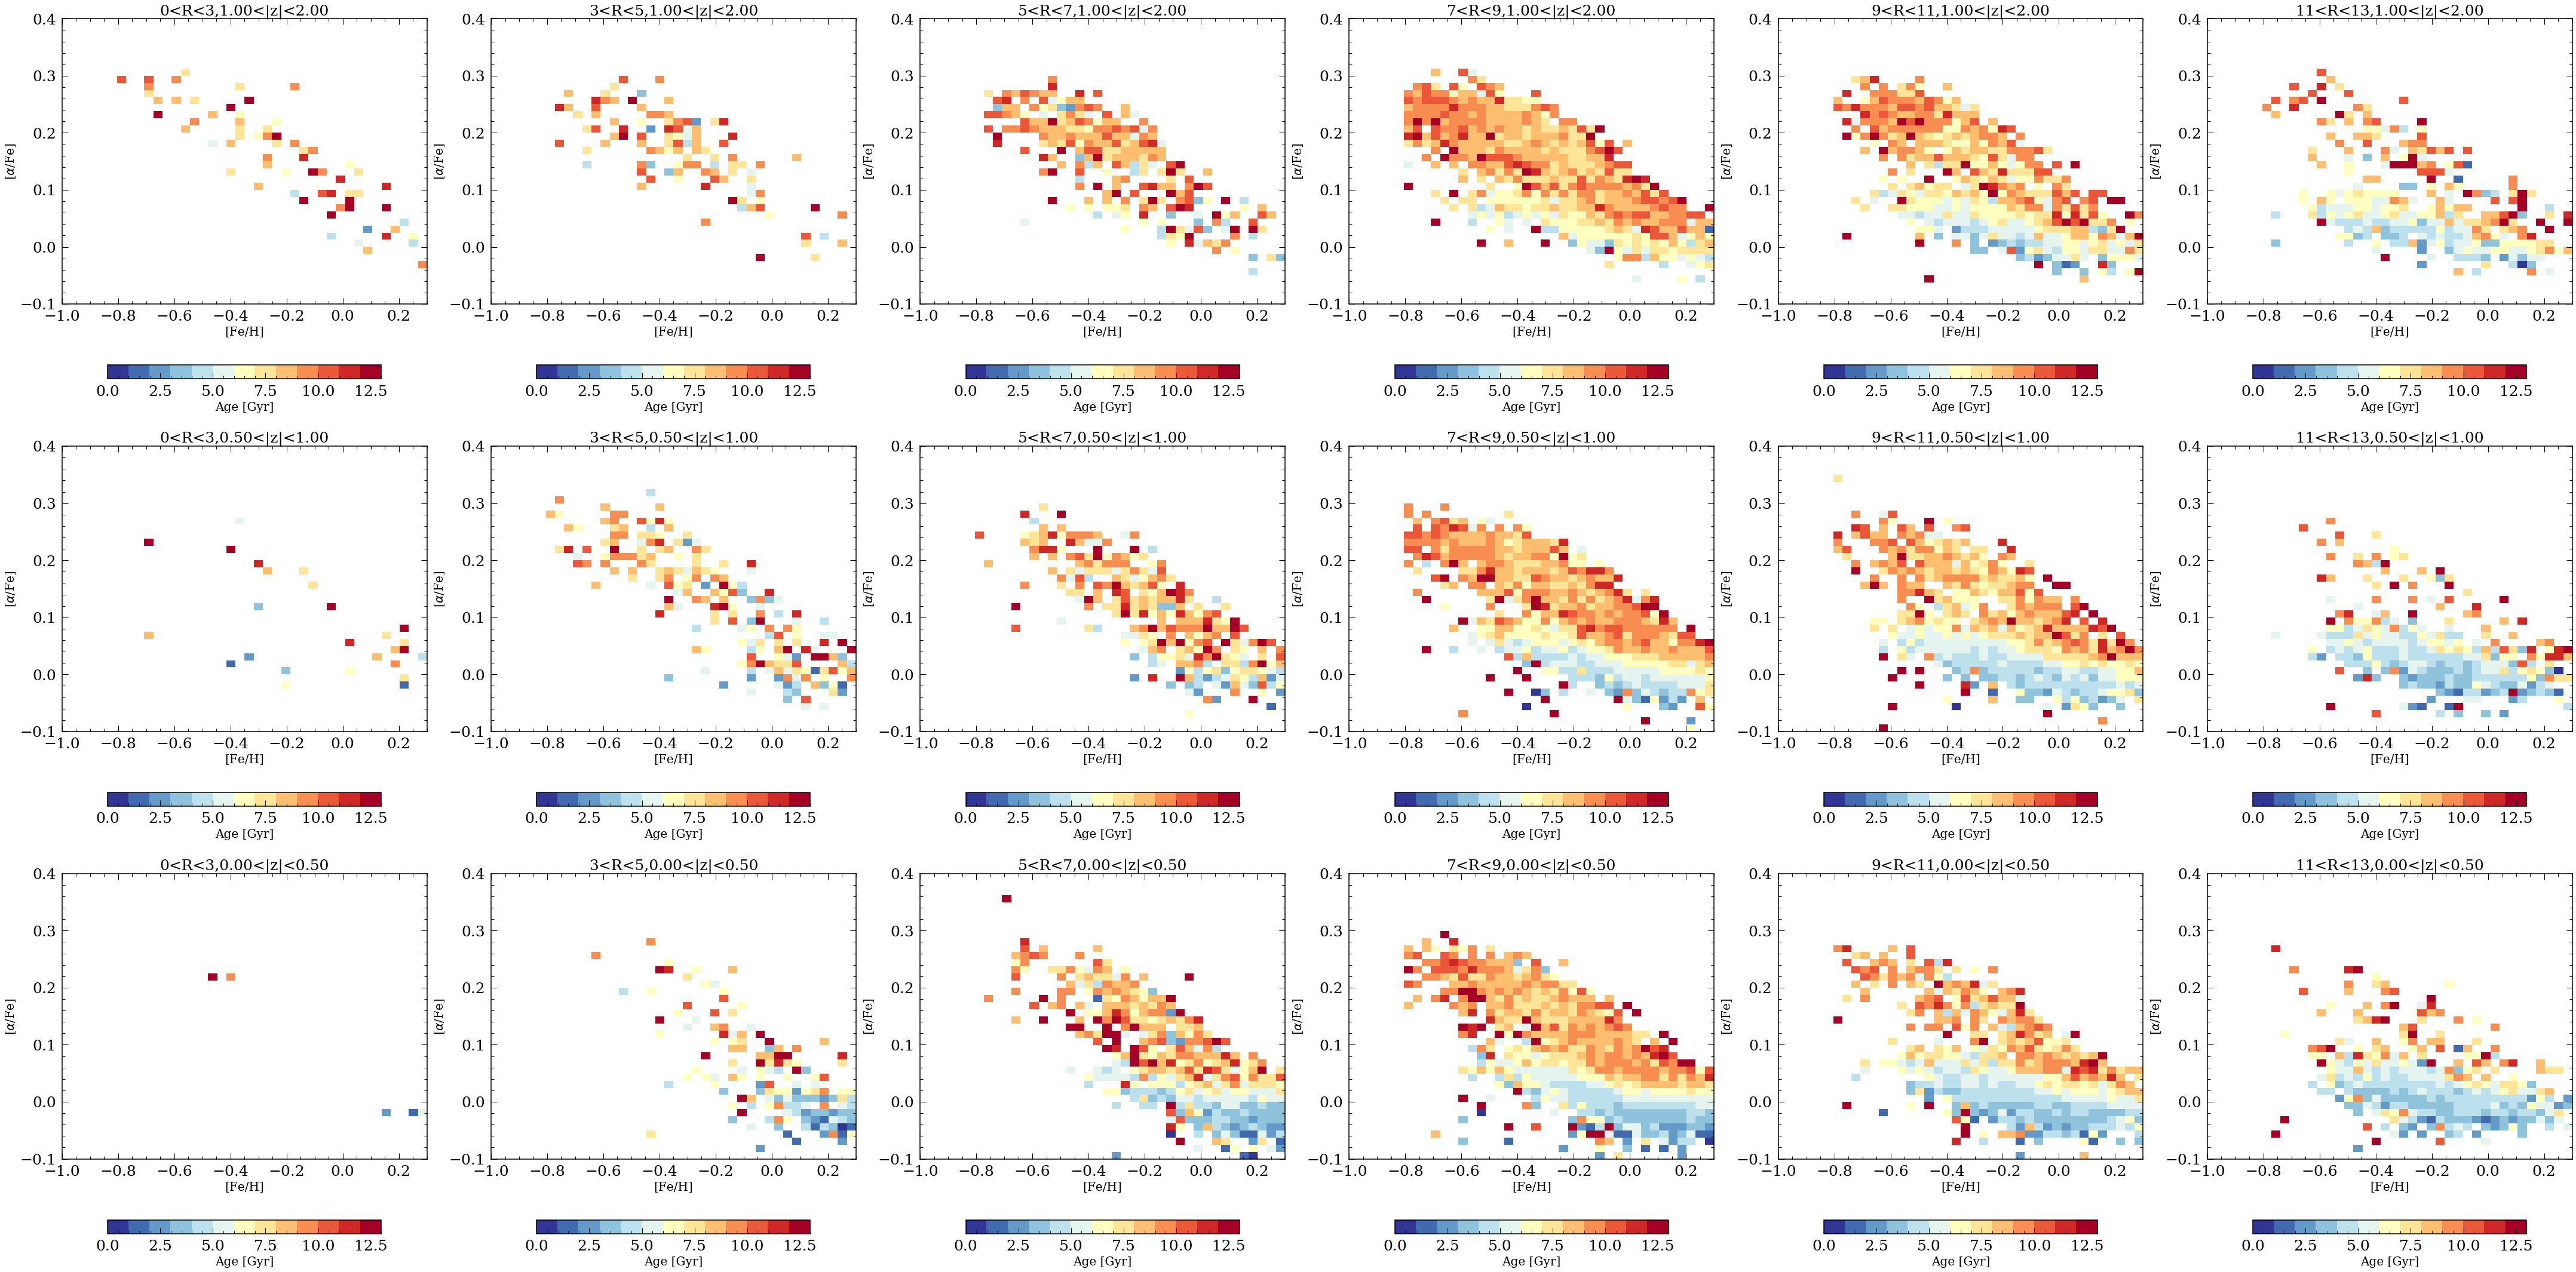

In [10]:
from scipy.ndimage import gaussian_filter

Rbin=[2,1,0.5,0]
zbin=[0,3,5,7,9,11,13]
plt.figure(figsize=(len(zbin)*10-10,len(Rbin)*10-10))
count=1

x1,x2,y1,y2 = -1,0.3,-0.1,0.4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

for i in range(len(Rbin)-1):
    print(i/(len(Rbin)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in trange(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        
        plt.subplot(len(Rbin)-1,len(zbin)-1,count)
        image=makeagemap_each(df_all_z['M_H'].values,df_all_z['ALPHA_M'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        plt.subplots_adjust(bottom=0.20)
        plt.xlabel("[Fe/H]",fontsize = 20,labelpad =5)
        plt.ylabel("[$\\alpha$/Fe]" ,fontsize = 20)
    
        cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        fs = 20
        cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
        plt.tight_layout()
plt.savefig('agespacial.png')

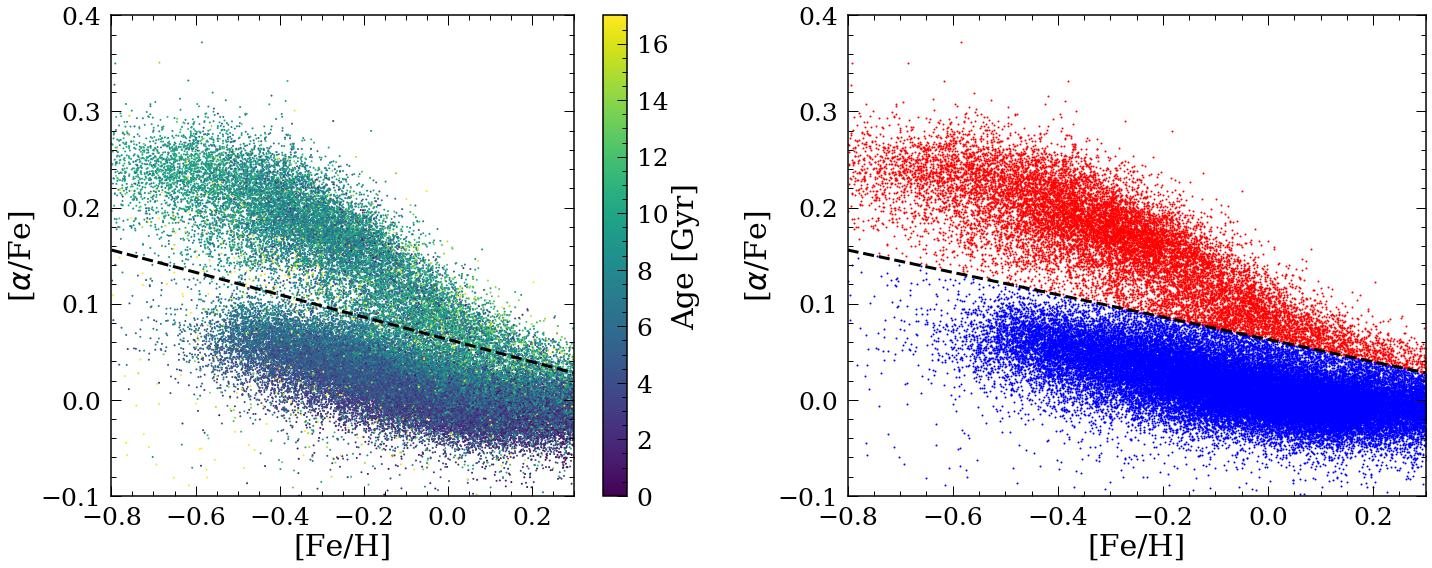

In [16]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df_CM['M_H'],df_CM['ALPHA_M'],c=df_CM['Age'],vmin=0,vmax=17,s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])>=0]
low_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])<0]

plt.subplot(1,2,2)
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',s=1)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()
plt.savefig('allstarFealpha.png')

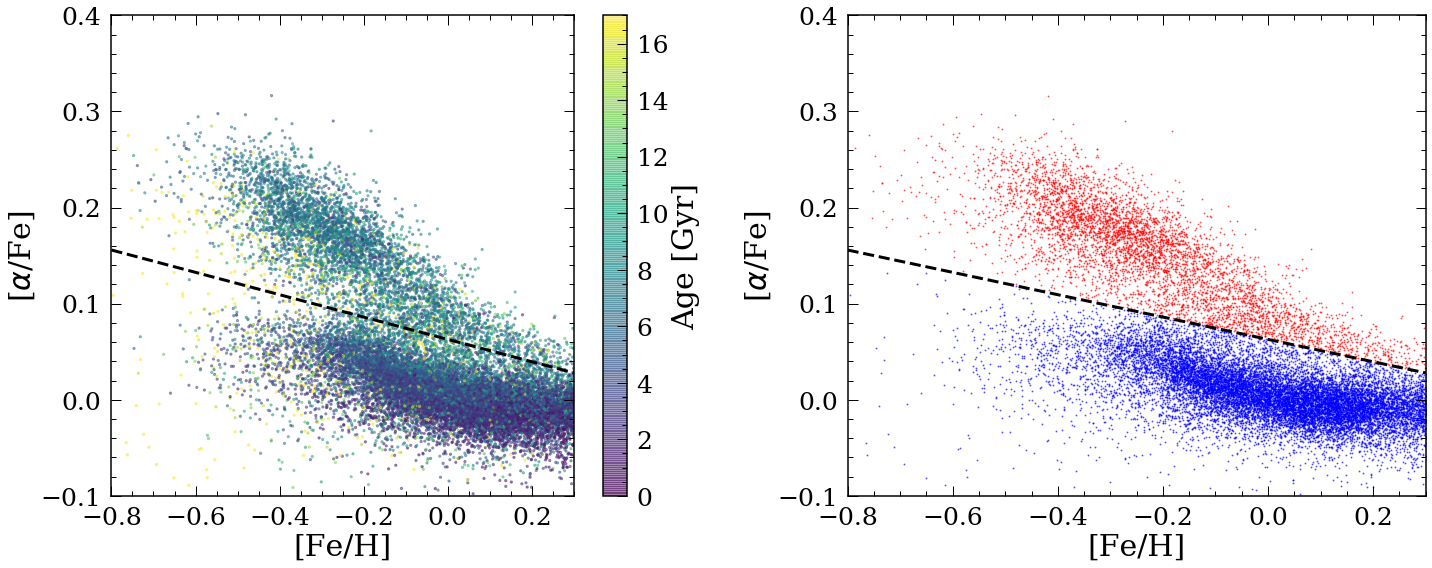

In [14]:
# only for RC stars
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df_rc['M_H'],df_rc['ALPHA_M'],c=df_rc['Age'],vmin=0,vmax=17,alpha=0.5,s=5)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])>=0]
low_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])<0]

plt.subplot(1,2,2)
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',alpha=0.5,s=1)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',alpha=0.5,s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()

In [30]:
df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.1]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.1]

rangeTeff=25
tempcut=4674
print(len(df_abun_st_ha))
df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['TEFF']-tempcut)<rangeTeff]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['TEFF']-tempcut)<rangeTeff]
print(len(df_abun_st_ha),len(df_abun_st_la))

980
302 703


100%|██████████| 100/100 [00:00<00:00, 220.60it/s]


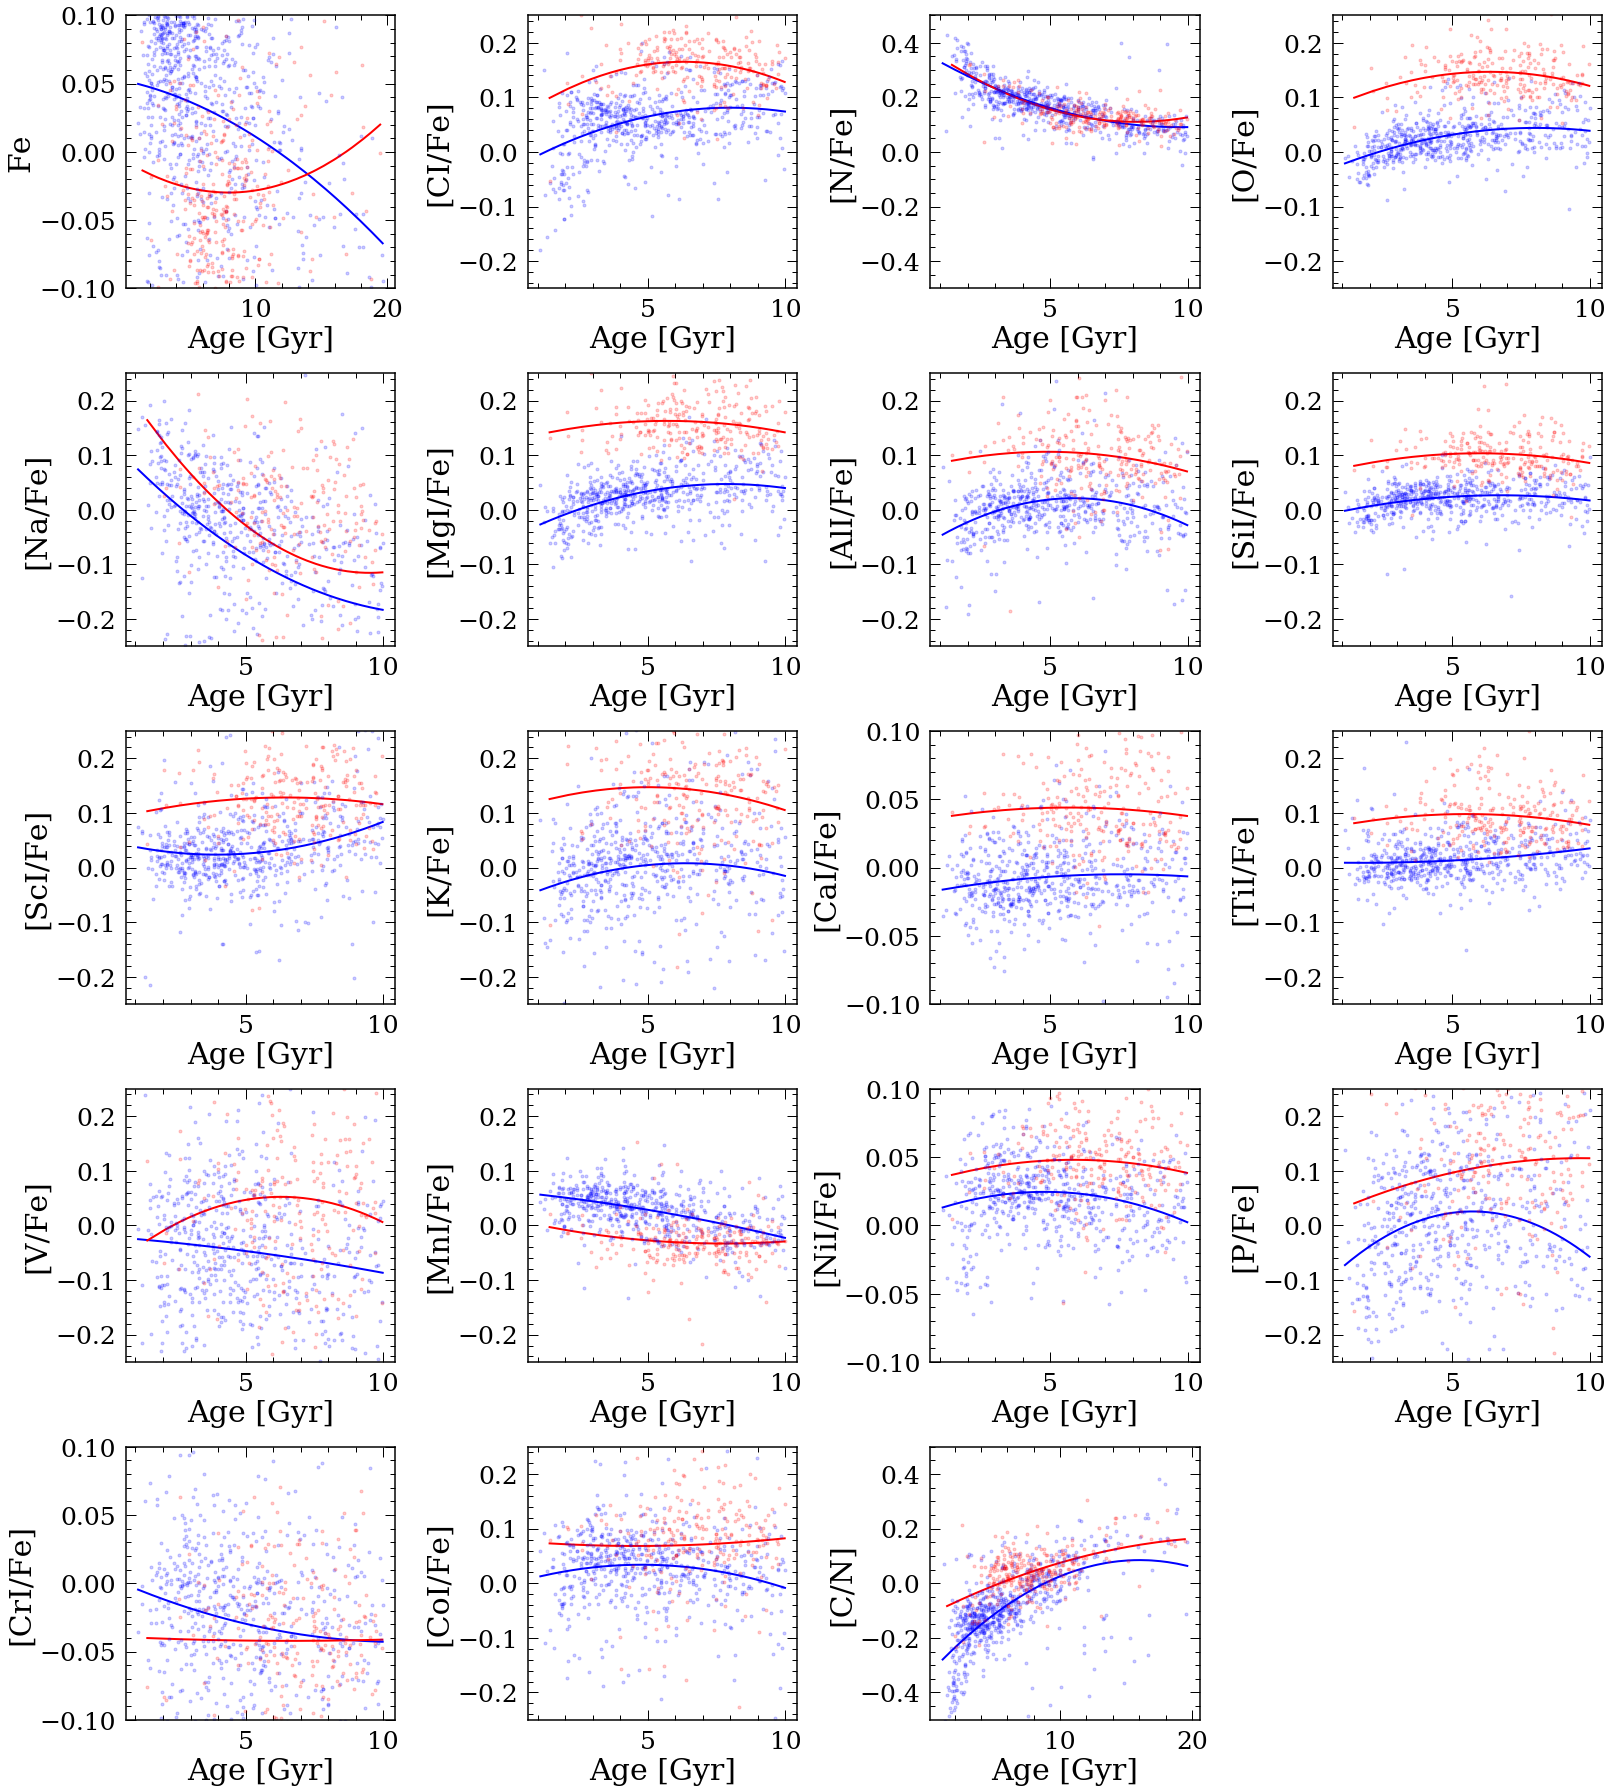

In [31]:
hi_dis, lo_dis, tot_hi_dis, tot_lo_dis, Abunname=plotTrends(df_abun_st_ha,df_abun_st_la,'abundance_rc','linear',2)


  0%|          | 0/100 [00:00<?, ?it/s]

C_N



100%|██████████| 100/100 [02:37<00:00,  1.58s/it]

100%|██████████| 100/100 [04:04<00:00,  2.44s/it]

100%|██████████| 100/100 [06:48<00:00,  4.08s/it]

 30%|███       | 3/10 [13:31<29:20, 251.47s/it]


100%|██████████| 100/100 [09:38<00:00,  5.78s/it]

100%|██████████| 100/100 [04:23<00:00,  2.63s/it]

 76%|███████▌  | 76/100 [01:04<00:19,  1.24it/s]


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

100%|██████████| 100/100 [00:50<00:00,  1.97it/s]

 92%|█████████▏| 92/100 [00:22<00:02,  3.54it/s]


100%|██████████| 100/100 [00:24<00:00,  4.00it/s]

100%|██████████| 100/100 [00:19<00:00,  5.10it/s]

100%|██████████| 100/100 [00:09<00:00, 10.80it/s][A

 25%|██▌       | 25/100 [00:01<00:03, 18.95it/s]


100%|██████████| 10/10 [31:26<00:00, 188.62s/it]


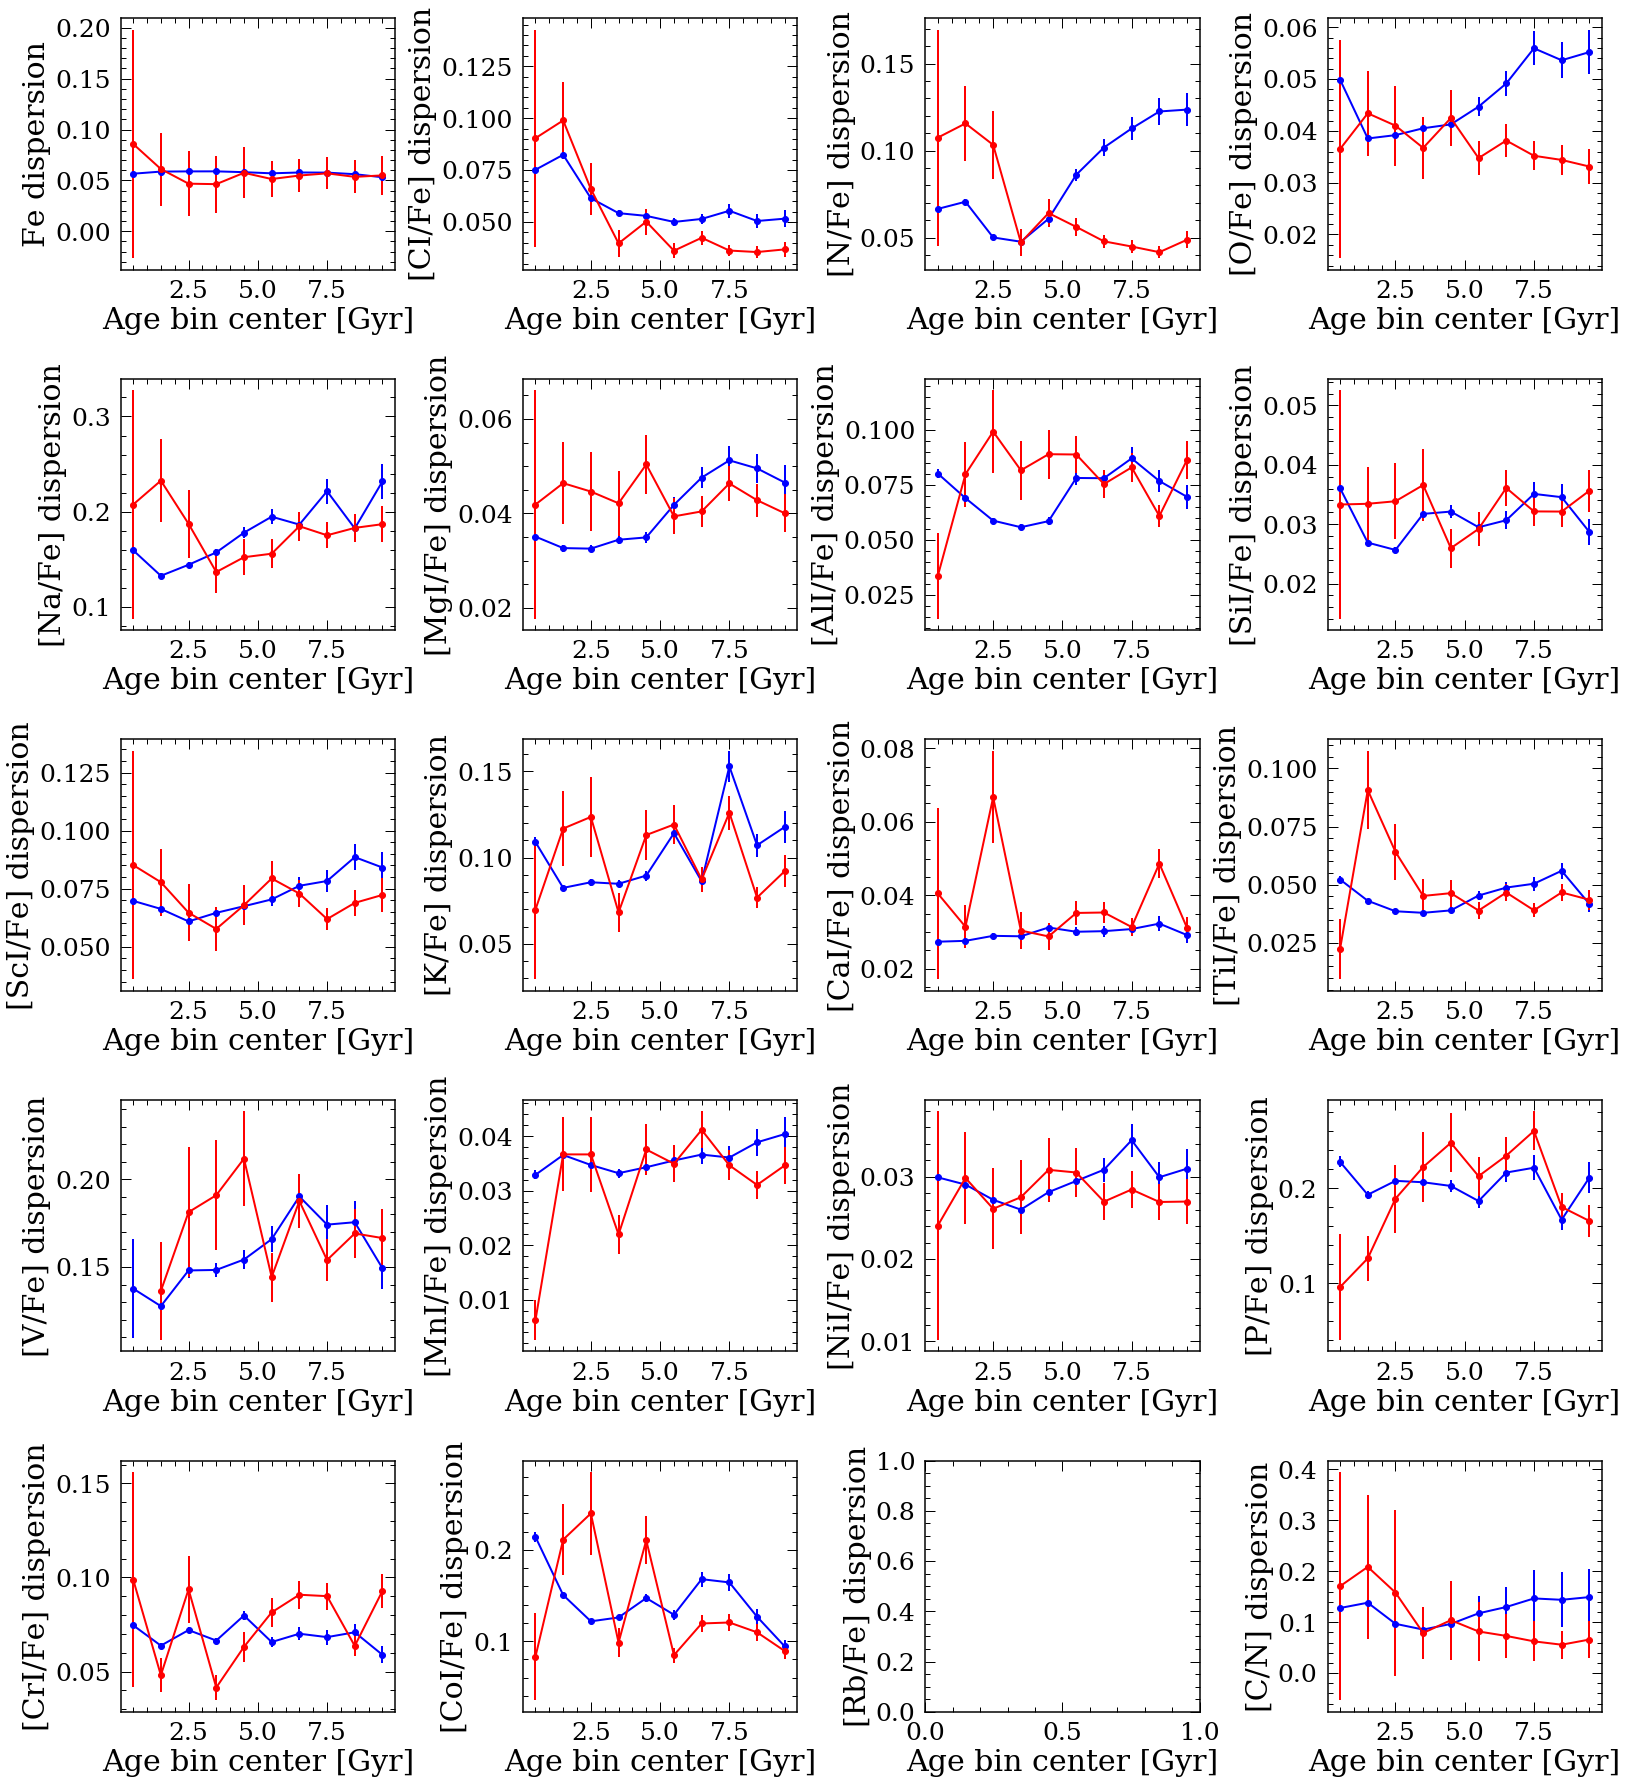

In [17]:
plotagedis(df_abun_st_ha,df_abun_st_la,1,0,10)

# Intrinsic dispersions/gradient

In [40]:
df_disp_plot=pd.read_pickle('../intrinsic.pkl')

elements=['C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE','V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','M_H','C_N']
ha_err=[]
la_err=[]
df_abun_st_ha['C_N_ERR']=np.sqrt(df_abun_st_ha['C_FE_ERR']**2+df_abun_st_ha['N_FE_ERR']**2)
df_abun_st_la['C_N_ERR']=np.sqrt(df_abun_st_la['C_FE_ERR']**2+df_abun_st_la['N_FE_ERR']**2)
for i in elements:
    df_abun_st_ha=df_abun_st_ha.loc[df_abun_st_ha[i+"_ERR"]>0]
    df_abun_st_la=df_abun_st_la.loc[df_abun_st_la[i+"_ERR"]>0]
    ha_err.append(np.mean(df_abun_st_ha[i+"_ERR"].dropna()))
    la_err.append(np.mean(df_abun_st_la[i+"_ERR"].dropna()))

df_disp_plot['ha_err_all']=ha_err
df_disp_plot['la_err_all']=la_err



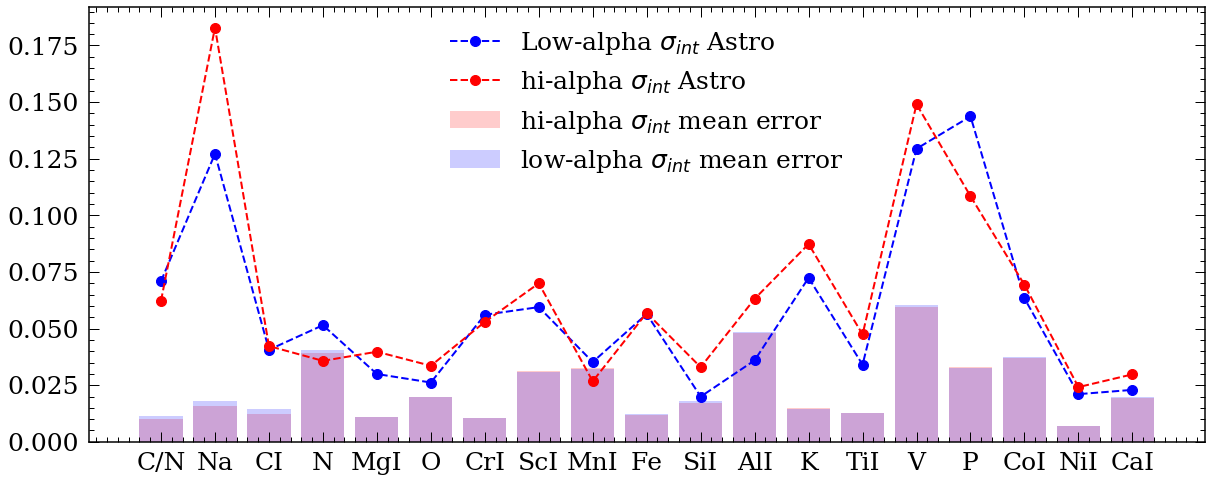

In [41]:
plt.figure(figsize=(20,8))
plt.plot(df_disp_plot['Abund'],df_disp_plot['la_dis_astro'],'b--o',label='Low-alpha $\sigma_{int}$ Astro',markersize=10)
plt.plot(df_disp_plot['Abund'],df_disp_plot['ha_dis_astro'],'r--o',label='hi-alpha $\sigma_{int}$ Astro',markersize=10)
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['ha_err_all'].values,alpha=0.2,
        color='r',label='hi-alpha $\sigma_{int}$ mean error')
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['la_err_all'].values,alpha=0.2,
        color='b',label='low-alpha $\sigma_{int}$ mean error')

plt.legend()
plt.savefig('dispersion_comp_2dpoly_as.png')

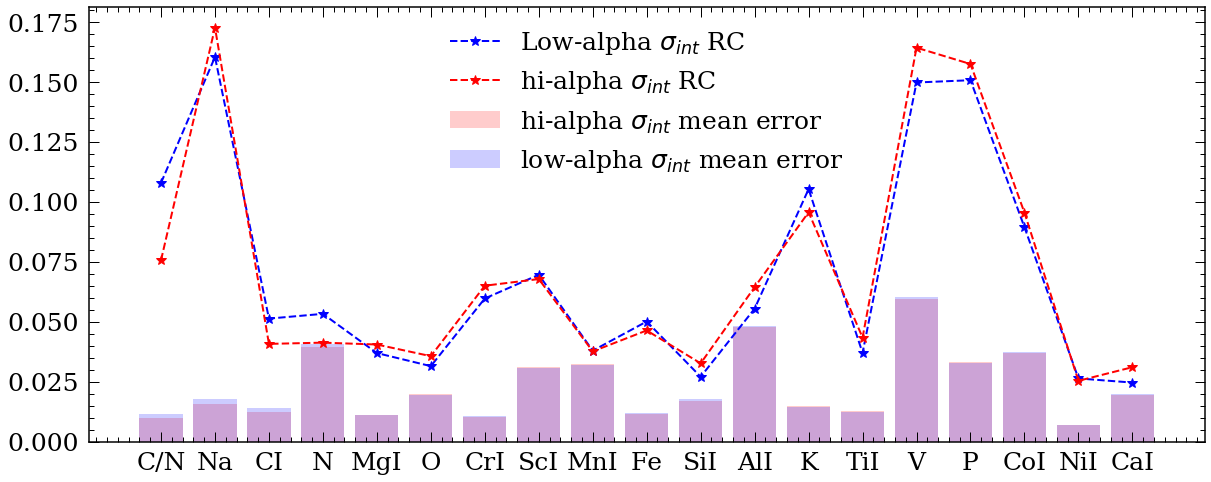

In [42]:
plt.figure(figsize=(20,8))
plt.plot(df_disp_plot['Abund'],df_disp_plot['la_dis_rc'],'b--*',label='Low-alpha $\sigma_{int}$ RC',markersize=10)
plt.plot(df_disp_plot['Abund'],df_disp_plot['ha_dis_rc'],'r--*',label='hi-alpha $\sigma_{int}$ RC',markersize=10)

plt.bar(df_disp_plot['Abund'].values,df_disp_plot['ha_err_all'].values,alpha=0.2,
        color='r',label='hi-alpha $\sigma_{int}$ mean error')
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['la_err_all'].values,alpha=0.2,
        color='b',label='low-alpha $\sigma_{int}$ mean error')

plt.legend()
plt.savefig('dispersion_comp_2dpoly_rc.png')

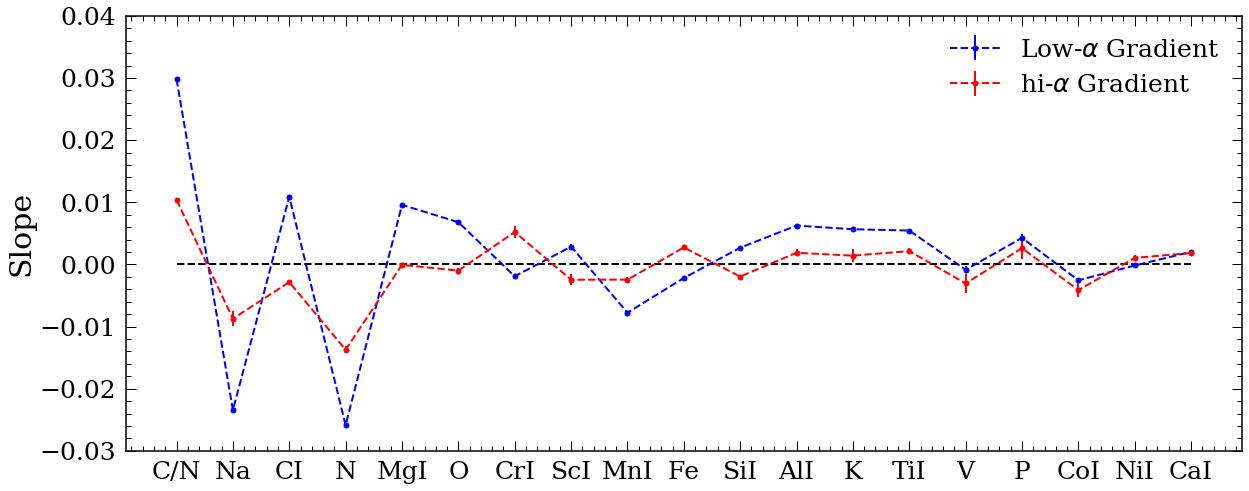

In [43]:
df_disp_plot['diff']=abs(df_disp_plot['la_grad']-df_disp_plot['ha_grad'])
df_disp_plot=df_disp_plot.sort_values(by='diff',ascending=False)
plt.figure(figsize=(20,8))
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['la_grad'],yerr=df_disp_plot['la_grad_err'],
             fmt='bo--',label='Low-$\\alpha$ Gradient',markersize=5)
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['ha_grad'],yerr=df_disp_plot['ha_grad_err'],
             fmt='ro--',label='hi-$\\alpha$ Gradient',markersize=5)
plt.plot(df_disp_plot['Abund'],np.zeros(len(df_disp_plot['Abund'])),'k--')

plt.ylim([-0.03,0.04])
plt.ylabel('Slope')
plt.legend()
plt.savefig('slopes.png')

# Fe-age

In [17]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')

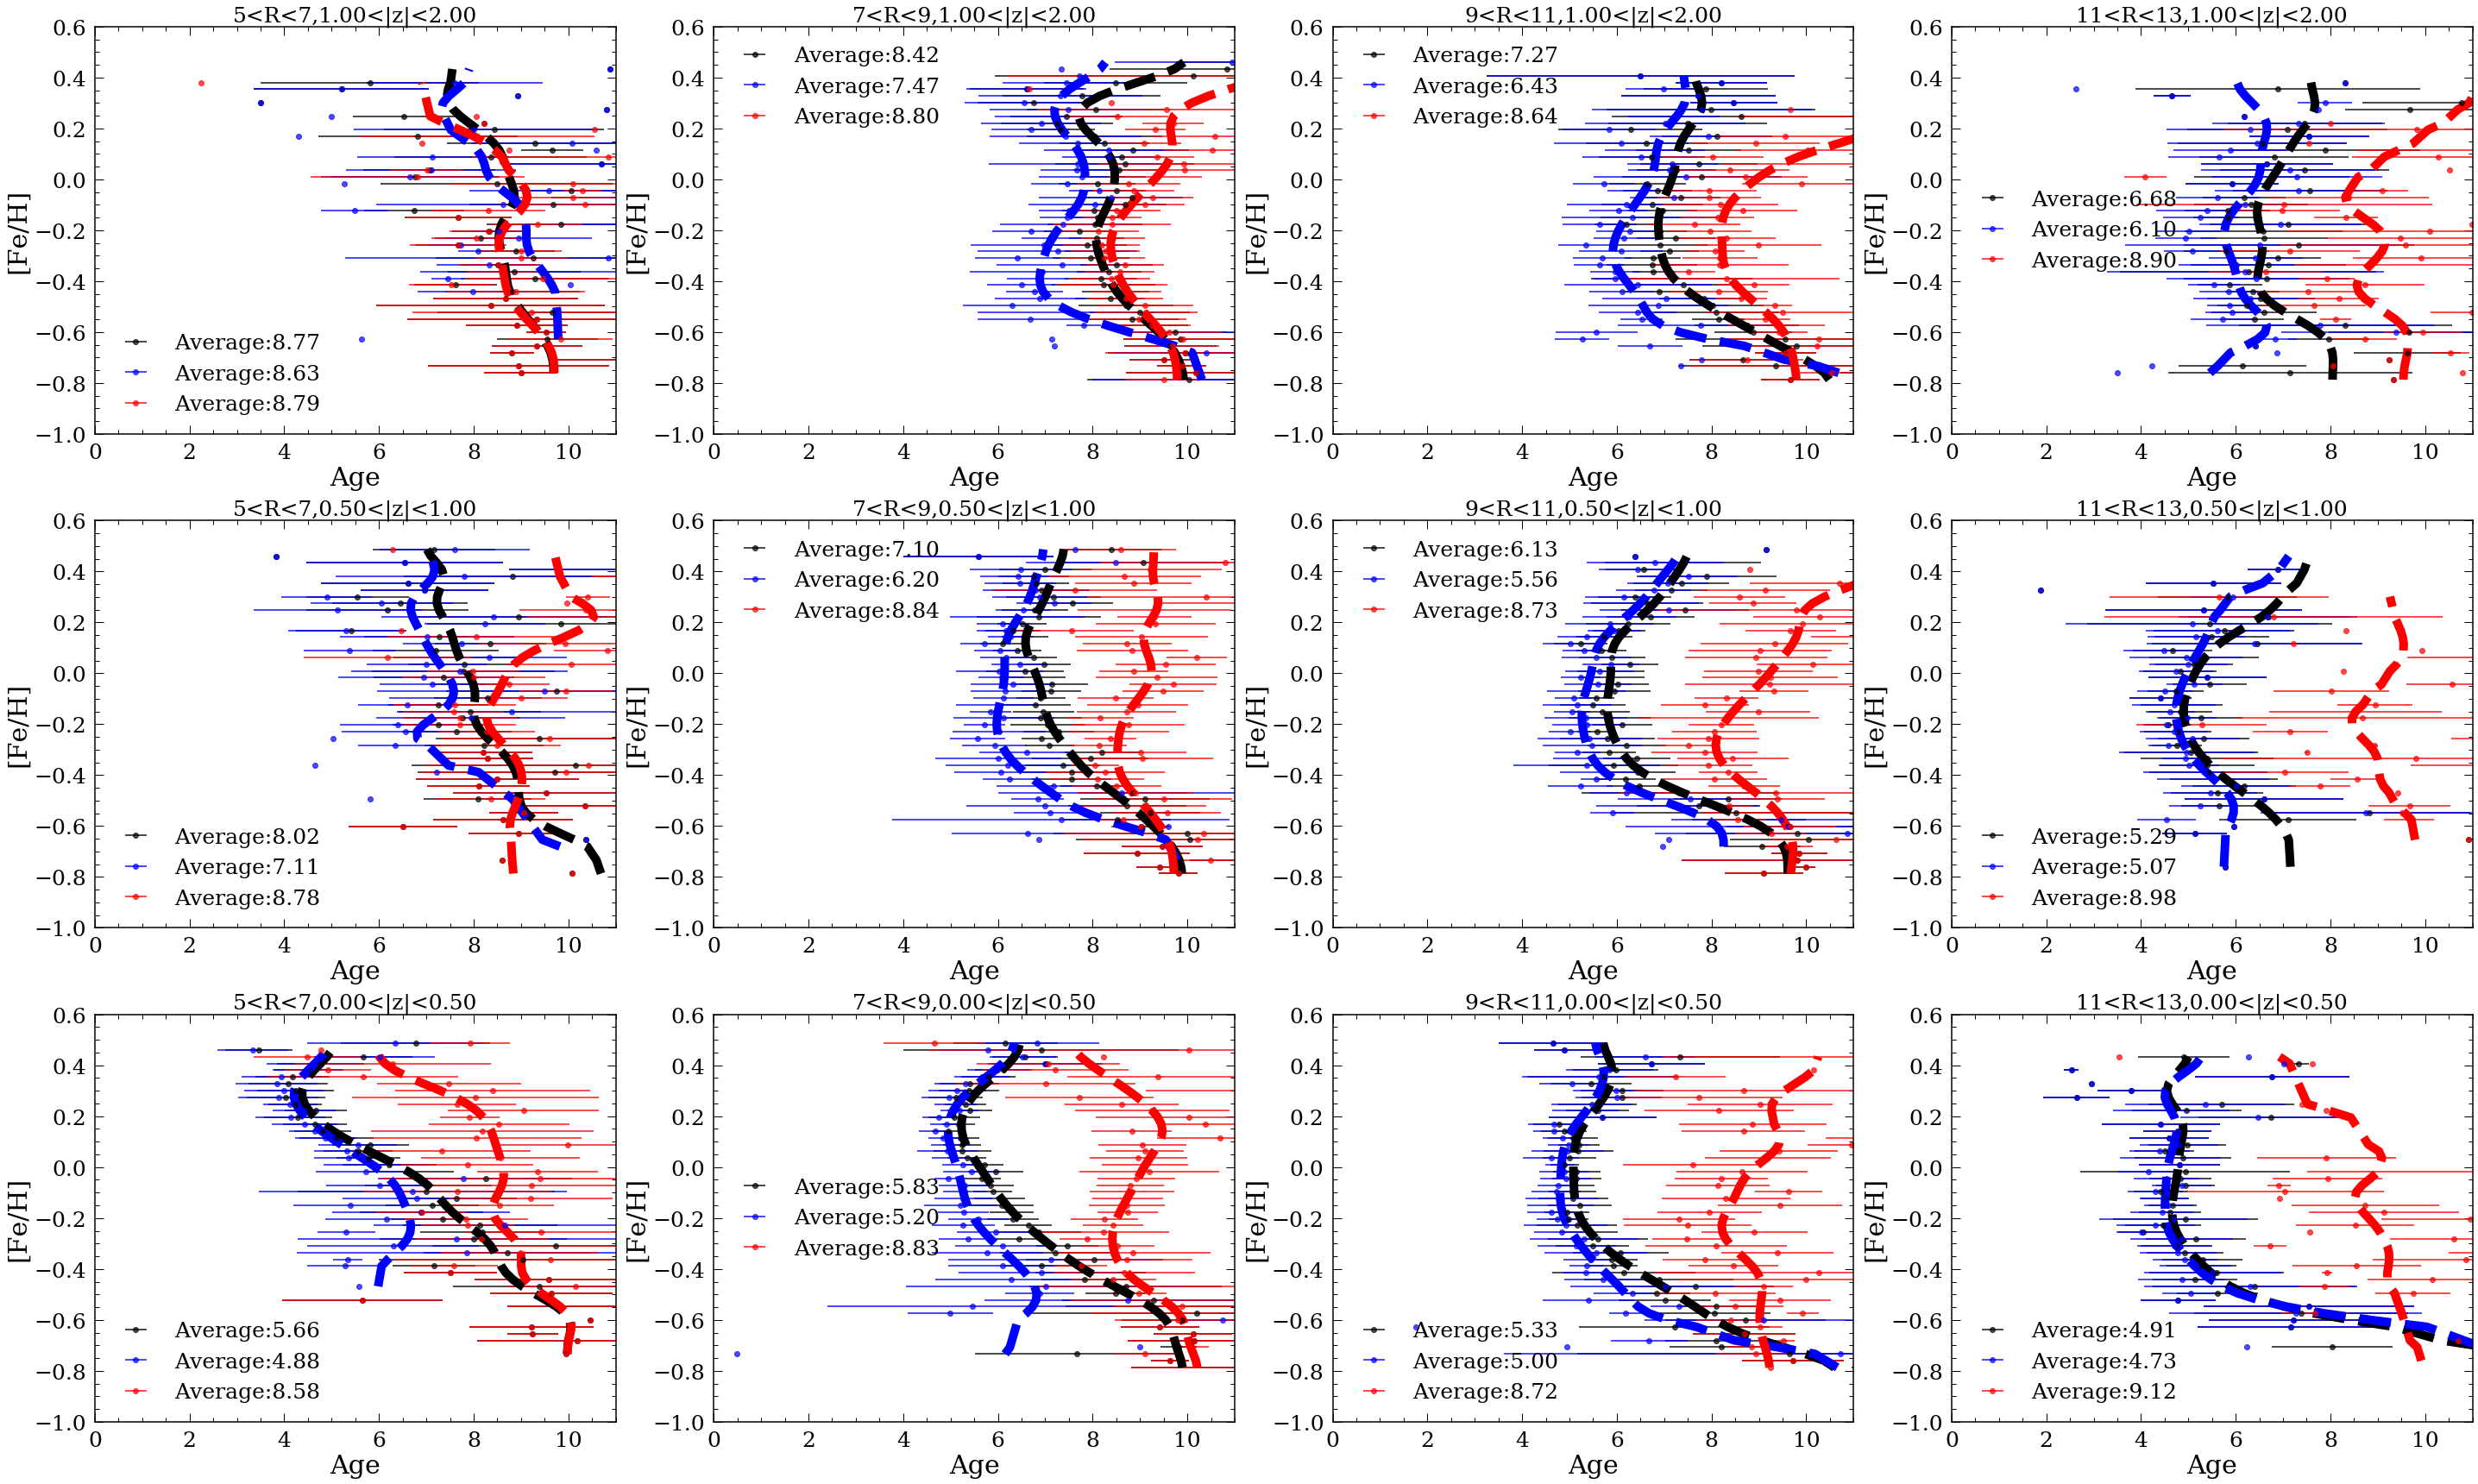

In [38]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
Rbin=[2,1,0.5,0]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        ha_bin_z=df_all_z[df_all_z['ALPHA_M']-p(df_all_z['M_H'])>=0]
        la_bin_z=df_all_z[df_all_z['ALPHA_M']-p(df_all_z['M_H'])<0]
        
        #meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'].values,df_all_z['M_H'].values)
        allage=np.append(la_bin_z['Age'].values,ha_bin_z['Age'].values)
        allmh=np.append(la_bin_z['M_H'].values,ha_bin_z['M_H'].values)
        meanfeh,meanage,meanage_err,starnumb=getave_age(allage,allmh)
        
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=getave_age(la_bin_z['Age'].values,
                                                                    la_bin_z['M_H'].values)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
        
        
        
        clear_output(wait = True)
        plt.subplot(3,4,count)
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        filterage=gaussian_filter(meanage, sigma=3)
        plt.plot(filterage,meanfeh,'k--',linewidth=10)
        
        m=(meanfeh_la!=0)
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m]
        filterage=gaussian_filter(meanage_la, sigma=3)
        plt.plot(filterage,meanfeh_la,'b--',linewidth=10)
        
        m=(meanfeh_ha!=0)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
        filterage=gaussian_filter(meanage_ha, sigma=3)
        plt.plot(filterage,meanfeh_ha,'r--',linewidth=10)
        
        plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(allage))
        plt.errorbar(meanage_la,meanfeh_la,xerr=meanage_err_la,fmt='bo',alpha=0.7,label='Average:%.2f'%np.mean(la_bin_z['Age']))
        plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,fmt='ro',alpha=0.7,label='Average:%.2f'%np.mean(ha_bin_z['Age']))
        #plt.xlim([0,10])
        #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        #plt.title('All stars',fontsize=25)

        #plt.scatter(ha_bin['Age'],ha_bin['M_H'],c='r',alpha=0.5)
        #plt.scatter(la_bin['Age'],la_bin['M_H'],c='b',alpha=0.5)
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
        plt.tight_layout()
        
plt.savefig('FeAge.png')

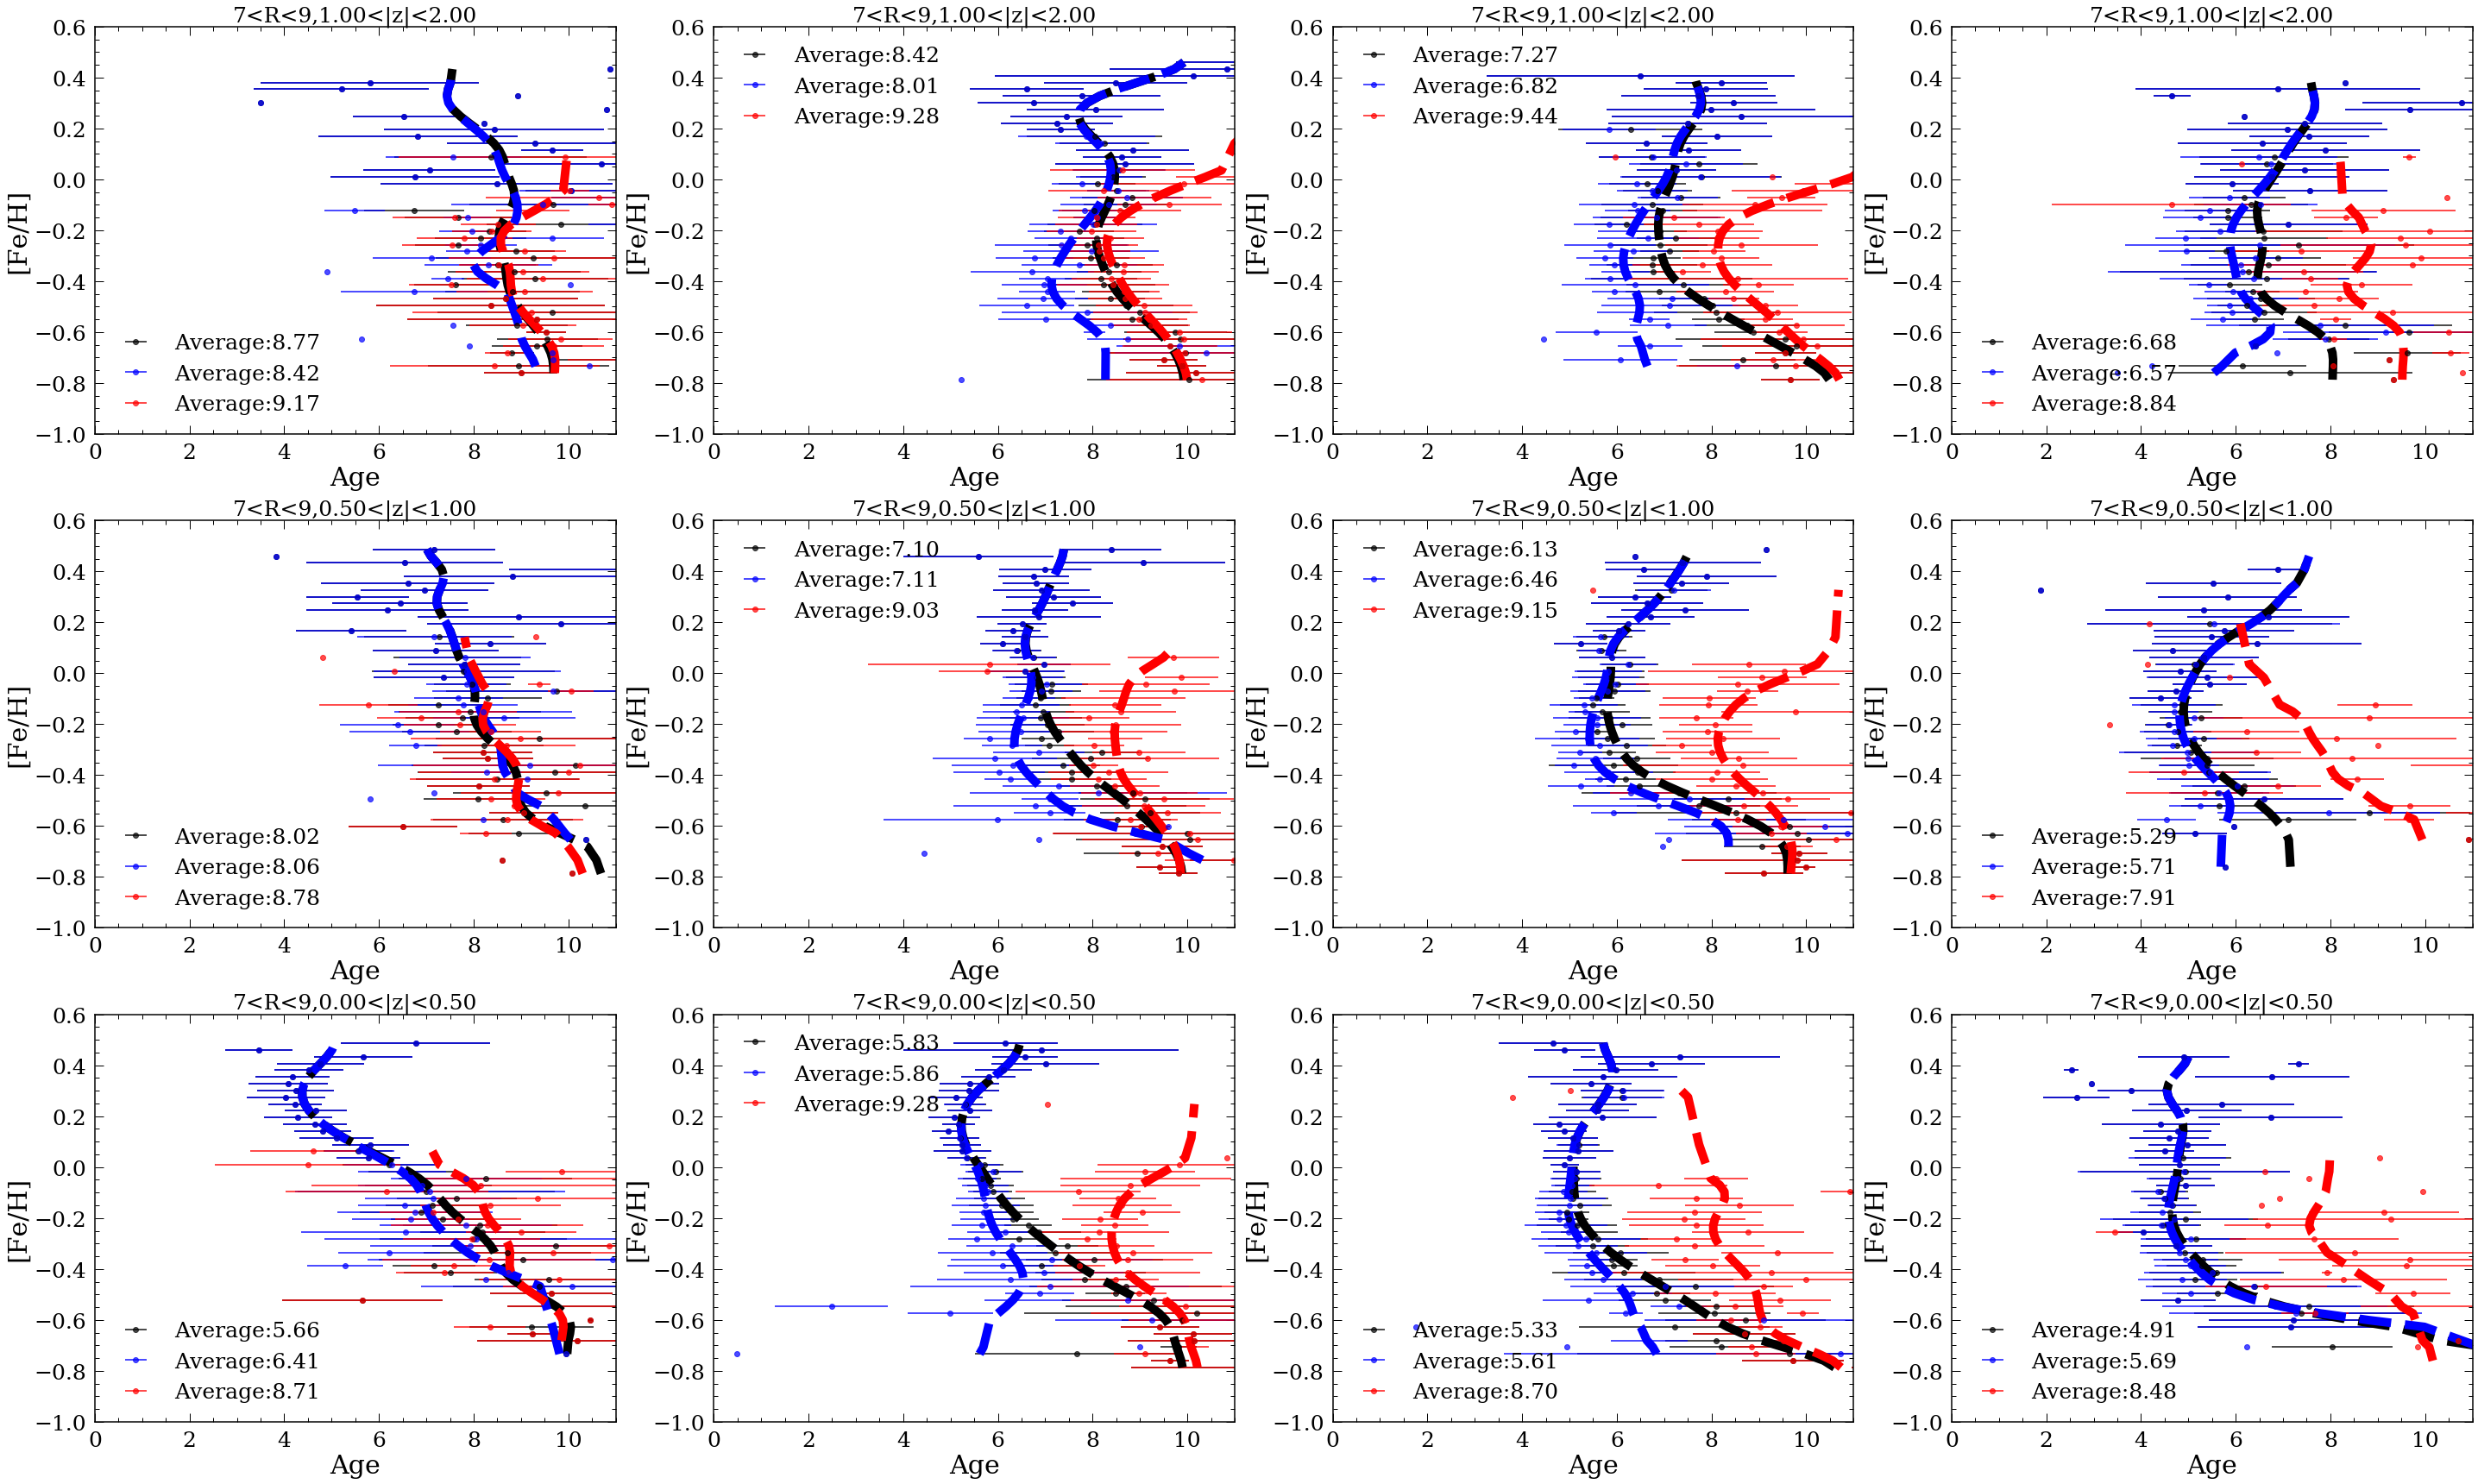

In [34]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
Rbin=[2,1,0.5,0]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'],df_all_z['M_H'])
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        
        plt.subplot(3,4,count)
        plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(df_all_z['Age']))
        filterage=gaussian_filter(meanage, sigma=3)
        plt.plot(filterage,meanfeh,'k--',linewidth=10)
        
        
        colors=['b','r','y']
        for j in df_CM['hi_low'].unique():
            ha_bin_z=df_all_z.loc[df_all_z['hi_low']==j]
            meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
            
            m=(meanfeh_ha!=0)
            meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
            clear_output(wait = True)
    
            plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,color=colors[j],
                         fmt='o',alpha=0.7,label='Average:%.2f'%np.mean(meanage_ha))
            filterage=gaussian_filter(meanage_ha, sigma=3)
            plt.plot(filterage,meanfeh_ha,'--',color=colors[j],linewidth=10)
            
            #plt.scatter(meanage_ha,meanfeh_ha,c=colors[j],label='Average:%.2f'%np.mean(ha_bin_z['Age']))
            
        
        #plt.xlim([0,10])
        #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        #plt.title('All stars',fontsize=25)

        #plt.scatter(ha_bin['Age'],ha_bin['M_H'],c='r',alpha=0.5)
        #plt.scatter(la_bin['Age'],la_bin['M_H'],c='b',alpha=0.5)
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
        plt.tight_layout()
        
plt.savefig('FeAge_cluster.png')